In [395]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [396]:
df_10_year_breakeven_inflation_rate = pd.read_csv("10-Year Breakeven Inflation Rate")
df_15_Year_Fixed_Rate_Mortgage = pd.read_csv("15-Year Fixed Rate Mortgage Average")
df_30_year_Fixed_Rate_Mortgage = pd.read_csv("30-Year Fixed Rate Mortgage Average")
df_5_Year_Breakeven_Inflation_Rate = pd.read_csv("5-Year Breakeven Inflation Rate")
df_7_Year_Breakeven_Inflation_Rate = pd.read_csv("7-Year Breakeven Inflation Rate")
df_Interest_Rates_Long_Term_Government_Bond_Yields_10_Year = pd.read_csv("Interest_Rates_ Long_Term_Government_Bond_Yields_10-Year")
df_Real_Residential_Property_Prices_for_United_States = pd.read_csv("Real_residential_property_prices_index")
df_All_Transactions_House_Price_Index = pd.read_csv("All-Transactions House Price Index")
df_Employment_Level = pd.read_csv("Employment Level")
df_GDP = pd.read_csv("GDP")
df_Households_Owners_Equity_in_Real_Estate = pd.read_csv("Households - Owners Equity in Real Estate")
df_Housing_Inventory_Estimate_Total_Housing_Units = pd.read_csv("Housing Inventory Estimate Total Housing Units")
df_Median_Sales_Price_for_New_Houses_Sold = pd.read_csv("Median Sales Price for New Houses Sold")
df_personal_income_billions = pd.read_csv("Personal Income - PI.csv")
df_population = pd.read_csv("Population")
df_Purchase_Only_Index_ = pd.read_csv("Purchase-Only-Index")
df_Real_Disposable_Personal_Income_Per_Capita = pd.read_csv("Real Disposable Personal Income_ Per Capita")
df_Real_Estate_Loans_disbursed_by_commercial_banks = pd.read_csv("Real Estate Loans-Commercial Real Estate Loans, All Commercial Banks")
df_Real_GDP_per_capita = pd.read_csv("Real gross domestic product per capita")
df_target = pd.read_csv("S&P_Case-Shiller U.S. National Home Price Index")
df_unemployment = pd.read_csv("UNEMPLOYMENT.csv")
df_employment_private = pd.read_csv("Employment-private.csv")
df_employment_government = pd.read_csv("Employee-government.csv")
df_expected_inflation = pd.read_csv("Inflation Expectation.csv")
df_residential_real_estate_loans = pd.read_csv("Residential_Real_Estate_Loans.csv")

In [397]:
# Displaying dataframe
df_residential_real_estate_loans

,DATE,Residential Real Estate Loans (Billions)
0,2003-01-01,222.136723
1,2003-04-01,237.148862
2,2003-07-01,252.026869
3,2003-10-01,270.973507
4,2004-01-01,297.749169
...,...,...
77,2022-04-01,247.945554
78,2022-07-01,251.301139
79,2022-10-01,254.396531
80,2023-01-01,255.320900


In [398]:
# Loading the csv files into dictionary

file_names = [
    "10-Year Breakeven Inflation Rate",
    "15-Year Fixed Rate Mortgage Average",
    "30-Year Fixed Rate Mortgage Average",
    "5-Year Breakeven Inflation Rate",
    "7-Year Breakeven Inflation Rate",
    "Interest_Rates_ Long_Term_Government_Bond_Yields_10-Year",
    "Real_residential_property_prices_index",
    "All-Transactions House Price Index",
    "Employment Level",
    "GDP",
    "Households - Owners Equity in Real Estate",
    "Housing Inventory Estimate Total Housing Units",
    "Median Sales Price for New Houses Sold",
    "Personal Income - PI.csv",
    "Population",
    "Purchase-Only-Index",
    "Real Disposable Personal Income_ Per Capita",
    "Real Estate Loans-Commercial Real Estate Loans, All Commercial Banks",
    "Real gross domestic product per capita",
    "S&P_Case-Shiller U.S. National Home Price Index",
    "UNEMPLOYMENT.csv",
    "Employment-private.csv",
    "Employee-government.csv",
    "Residential_Real_Estate_Loans.csv",
    "Inflation Expectation.csv"
]

# Create an empty dictionary to store the DataFrames
dataframes = {}

# Load and copy each DataFrame
for file_name in file_names:
    df = pd.read_csv(file_name)
    copied_df = df.copy()
    dataframes[file_name] = copied_df

In [399]:
# Selecting one DataFrame as the base for merging
merged_data = dataframes["GDP"]

# Other DataFrames to be merged
dataframes_to_merge = [
    "10-Year Breakeven Inflation Rate",
    "15-Year Fixed Rate Mortgage Average",
    "30-Year Fixed Rate Mortgage Average",
    "5-Year Breakeven Inflation Rate",
    "7-Year Breakeven Inflation Rate",
    "Interest_Rates_ Long_Term_Government_Bond_Yields_10-Year",
    "Real_residential_property_prices_index",
    "All-Transactions House Price Index",
    "Employment Level",
    "Households - Owners Equity in Real Estate",
    "Housing Inventory Estimate Total Housing Units",
    "Median Sales Price for New Houses Sold",
    "Personal Income - PI.csv",
    "Population",
    "Purchase-Only-Index",
    "Real Disposable Personal Income_ Per Capita",
    "Real Estate Loans-Commercial Real Estate Loans, All Commercial Banks",
    "Real gross domestic product per capita",
    "S&P_Case-Shiller U.S. National Home Price Index",
    "UNEMPLOYMENT.csv",
    "Employment-private.csv",
    "Employee-government.csv",
    "Residential_Real_Estate_Loans.csv",
    "Inflation Expectation.csv"
]

# Merge the rest of the DataFrames into the base DataFrame
for dataframe_name in dataframes_to_merge:
    merged_data = merged_data.merge(dataframes[dataframe_name], on='DATE', how='inner')



In [400]:
# Displaying the new dataframe
merged_data

,DATE,GDP (Billions),Inflation Rate,15-Year Fixed Rate Mortgage (percent),30-Year Fixed Rate Mortgage (percent),Inflation Rate (5Y Breakeven),Inflation Rate (7Y Breakeven),Interest Rates - Long-Term Government Bond Yield 10 yrs,Real Residential Property Prices (Index 2010 = 100),All-Transactions House Price Index,...,USA\n\n(SA),Personal Income: Per Capita,Real Estate Loans - Commercial (Billions),GDP per capita,S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100),Unemployment (Thousands),Employment-Private,Employees-government,Residential Real Estate Loans (Billions),Inflation expectation
0,2003-01-01,11174.129,1.840984,5.204615,5.840769,1.580164,1.650000,3.920000,114.1698,279.84,...,167.83,36924.33333,NaN,50462,129.321333,8575.333333,108798.333333,21620.000000,222.136723,2.766667
1,2003-04-01,11312.766,1.682698,4.867692,5.506923,1.421270,1.516667,3.620000,116.2112,283.26,...,170.49,37261.00000,NaN,50796,131.755667,9021.666667,108599.000000,21589.333333,237.148862,2.166667
2,2003-07-01,11566.669,2.023750,5.356923,6.033846,1.779375,1.873333,4.233333,118.9971,287.62,...,173.49,37802.66667,NaN,51512,135.013333,8942.666667,108631.666667,21564.333333,252.026869,2.333333
3,2003-10-01,11772.234,2.274355,5.248571,5.919286,2.011290,2.130000,4.286667,122.8818,295.76,...,177.20,37814.33333,NaN,51986,138.835000,8541.666667,108959.000000,21546.333333,270.973507,2.633333
4,2004-01-01,11923.447,2.317581,4.897500,5.597500,2.176613,2.260000,4.020000,125.9256,300.42,...,181.23,37911.66667,NaN,52179,143.299000,8342.666667,109350.000000,21558.666667,297.749169,2.733333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2022-04-01,25544.273,2.727581,4.450769,5.266154,3.074839,2.930000,2.930000,161.7122,617.63,...,388.68,48031.00000,2635.328138,65127,303.088000,5964.000000,129933.000000,22111.000000,247.945554,5.333333
78,2022-07-01,25994.639,2.421250,4.880769,5.623077,2.575938,2.533333,3.106667,158.1889,628.14,...,391.50,48388.00000,2722.260462,65462,301.625667,5836.333333,131113.666667,22217.666667,251.301139,4.900000
79,2022-10-01,26408.405,2.340000,5.959231,6.664615,2.409016,2.403333,3.830000,157.5075,623.29,...,391.98,48580.00000,2808.115731,65783,298.269333,5925.000000,131973.333333,22305.666667,254.396531,4.766667
80,2023-01-01,26813.601,2.290806,5.564615,6.372308,2.352581,2.346667,3.646667,157.7020,626.07,...,392.91,49793.00000,2890.710008,66078,297.530333,5823.000000,132738.000000,22506.666667,255.320900,3.866667


In [401]:
# Checcking for null values
merged_data.isna()

,DATE,GDP (Billions),Inflation Rate,15-Year Fixed Rate Mortgage (percent),30-Year Fixed Rate Mortgage (percent),Inflation Rate (5Y Breakeven),Inflation Rate (7Y Breakeven),Interest Rates - Long-Term Government Bond Yield 10 yrs,Real Residential Property Prices (Index 2010 = 100),All-Transactions House Price Index,...,USA\n\n(SA),Personal Income: Per Capita,Real Estate Loans - Commercial (Billions),GDP per capita,S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100),Unemployment (Thousands),Employment-Private,Employees-government,Residential Real Estate Loans (Billions),Inflation expectation
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
78,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
79,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
80,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [402]:
# Displaying only those rows containing null values
nan_rows = merged_data[merged_data.isna().any(axis=1)]
nan_rows

,DATE,GDP (Billions),Inflation Rate,15-Year Fixed Rate Mortgage (percent),30-Year Fixed Rate Mortgage (percent),Inflation Rate (5Y Breakeven),Inflation Rate (7Y Breakeven),Interest Rates - Long-Term Government Bond Yield 10 yrs,Real Residential Property Prices (Index 2010 = 100),All-Transactions House Price Index,...,USA\n\n(SA),Personal Income: Per Capita,Real Estate Loans - Commercial (Billions),GDP per capita,S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100),Unemployment (Thousands),Employment-Private,Employees-government,Residential Real Estate Loans (Billions),Inflation expectation
0,2003-01-01,11174.129,1.840984,5.204615,5.840769,1.580164,1.650000,3.920000,114.1698,279.84,...,167.83,36924.33333,NaN,50462,129.321333,8575.333333,108798.333333,21620.000000,222.136723,2.766667
1,2003-04-01,11312.766,1.682698,4.867692,5.506923,1.421270,1.516667,3.620000,116.2112,283.26,...,170.49,37261.00000,NaN,50796,131.755667,9021.666667,108599.000000,21589.333333,237.148862,2.166667
2,2003-07-01,11566.669,2.023750,5.356923,6.033846,1.779375,1.873333,4.233333,118.9971,287.62,...,173.49,37802.66667,NaN,51512,135.013333,8942.666667,108631.666667,21564.333333,252.026869,2.333333
3,2003-10-01,11772.234,2.274355,5.248571,5.919286,2.011290,2.130000,4.286667,122.8818,295.76,...,177.20,37814.33333,NaN,51986,138.835000,8541.666667,108959.000000,21546.333333,270.973507,2.633333
4,2004-01-01,11923.447,2.317581,4.897500,5.597500,2.176613,2.260000,4.020000,125.9256,300.42,...,181.23,37911.66667,NaN,52179,143.299000,8342.666667,109350.000000,21558.666667,297.749169,2.733333
5,2004-04-01,12112.815,2.551452,5.460000,6.106154,2.468710,2.496667,4.600000,129.0662,307.75,...,185.49,38216.33333,NaN,52469,148.209667,8222.666667,110021.333333,21609.666667,326.842131,3.266667


In [403]:
# Replace missing values in your column with the mean value
merged_data['Real Estate Loans - Commercial  (Billions)'].fillna(merged_data['Real Estate Loans - Commercial  (Billions)'].mean(), inplace=True)


In [404]:
merged_data

,DATE,GDP (Billions),Inflation Rate,15-Year Fixed Rate Mortgage (percent),30-Year Fixed Rate Mortgage (percent),Inflation Rate (5Y Breakeven),Inflation Rate (7Y Breakeven),Interest Rates - Long-Term Government Bond Yield 10 yrs,Real Residential Property Prices (Index 2010 = 100),All-Transactions House Price Index,...,USA\n\n(SA),Personal Income: Per Capita,Real Estate Loans - Commercial (Billions),GDP per capita,S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100),Unemployment (Thousands),Employment-Private,Employees-government,Residential Real Estate Loans (Billions),Inflation expectation
0,2003-01-01,11174.129,1.840984,5.204615,5.840769,1.580164,1.650000,3.920000,114.1698,279.84,...,167.83,36924.33333,1809.498337,50462,129.321333,8575.333333,108798.333333,21620.000000,222.136723,2.766667
1,2003-04-01,11312.766,1.682698,4.867692,5.506923,1.421270,1.516667,3.620000,116.2112,283.26,...,170.49,37261.00000,1809.498337,50796,131.755667,9021.666667,108599.000000,21589.333333,237.148862,2.166667
2,2003-07-01,11566.669,2.023750,5.356923,6.033846,1.779375,1.873333,4.233333,118.9971,287.62,...,173.49,37802.66667,1809.498337,51512,135.013333,8942.666667,108631.666667,21564.333333,252.026869,2.333333
3,2003-10-01,11772.234,2.274355,5.248571,5.919286,2.011290,2.130000,4.286667,122.8818,295.76,...,177.20,37814.33333,1809.498337,51986,138.835000,8541.666667,108959.000000,21546.333333,270.973507,2.633333
4,2004-01-01,11923.447,2.317581,4.897500,5.597500,2.176613,2.260000,4.020000,125.9256,300.42,...,181.23,37911.66667,1809.498337,52179,143.299000,8342.666667,109350.000000,21558.666667,297.749169,2.733333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2022-04-01,25544.273,2.727581,4.450769,5.266154,3.074839,2.930000,2.930000,161.7122,617.63,...,388.68,48031.00000,2635.328138,65127,303.088000,5964.000000,129933.000000,22111.000000,247.945554,5.333333
78,2022-07-01,25994.639,2.421250,4.880769,5.623077,2.575938,2.533333,3.106667,158.1889,628.14,...,391.50,48388.00000,2722.260462,65462,301.625667,5836.333333,131113.666667,22217.666667,251.301139,4.900000
79,2022-10-01,26408.405,2.340000,5.959231,6.664615,2.409016,2.403333,3.830000,157.5075,623.29,...,391.98,48580.00000,2808.115731,65783,298.269333,5925.000000,131973.333333,22305.666667,254.396531,4.766667
80,2023-01-01,26813.601,2.290806,5.564615,6.372308,2.352581,2.346667,3.646667,157.7020,626.07,...,392.91,49793.00000,2890.710008,66078,297.530333,5823.000000,132738.000000,22506.666667,255.320900,3.866667


In [405]:
# Creating a copy of data 
merged_data_copy = merged_data.copy()


In [406]:
# Renaming the copy of merged_data
working_data = merged_data_copy

In [407]:
# Displaying data types of features from working_data
working_data.dtypes

DATE                                                                 object
GDP (Billions)                                                      float64
Inflation Rate                                                      float64
15-Year Fixed Rate Mortgage (percent)                               float64
30-Year Fixed Rate Mortgage (percent)                               float64
Inflation Rate (5Y Breakeven)                                       float64
Inflation Rate (7Y Breakeven)                                       float64
Interest Rates - Long-Term Government Bond Yield 10 yrs             float64
Real Residential Property Prices (Index 2010 = 100)                 float64
All-Transactions House Price Index                                  float64
Employment Level (Thousands)                                        float64
Households - Owners Equity in Real Estate ( Billions)               float64
Housing Inventory Estimate (Thousands)                                int64
Median Sales

Data type of DATE is 'object' which can create problems in model training and further analysis
It needs to be converted to 'datetime'

In [408]:
# Conversion of Date from 'object' to 'datetime'
working_data['DATE'] = pd.to_datetime(working_data['DATE'])


In [409]:
working_data.dtypes

DATE                                                                datetime64[ns]
GDP (Billions)                                                             float64
Inflation Rate                                                             float64
15-Year Fixed Rate Mortgage (percent)                                      float64
30-Year Fixed Rate Mortgage (percent)                                      float64
Inflation Rate (5Y Breakeven)                                              float64
Inflation Rate (7Y Breakeven)                                              float64
Interest Rates - Long-Term Government Bond Yield 10 yrs                    float64
Real Residential Property Prices (Index 2010 = 100)                        float64
All-Transactions House Price Index                                         float64
Employment Level (Thousands)                                               float64
Households - Owners Equity in Real Estate ( Billions)                      float64
Hous

In [410]:
# Deleting month column it is repeatative and non-vital
del working_data['Month']


In [411]:
working_data

,DATE,GDP (Billions),Inflation Rate,15-Year Fixed Rate Mortgage (percent),30-Year Fixed Rate Mortgage (percent),Inflation Rate (5Y Breakeven),Inflation Rate (7Y Breakeven),Interest Rates - Long-Term Government Bond Yield 10 yrs,Real Residential Property Prices (Index 2010 = 100),All-Transactions House Price Index,...,USA\n\n(SA),Personal Income: Per Capita,Real Estate Loans - Commercial (Billions),GDP per capita,S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100),Unemployment (Thousands),Employment-Private,Employees-government,Residential Real Estate Loans (Billions),Inflation expectation
0,2003-01-01,11174.129,1.840984,5.204615,5.840769,1.580164,1.650000,3.920000,114.1698,279.84,...,167.83,36924.33333,1809.498337,50462,129.321333,8575.333333,108798.333333,21620.000000,222.136723,2.766667
1,2003-04-01,11312.766,1.682698,4.867692,5.506923,1.421270,1.516667,3.620000,116.2112,283.26,...,170.49,37261.00000,1809.498337,50796,131.755667,9021.666667,108599.000000,21589.333333,237.148862,2.166667
2,2003-07-01,11566.669,2.023750,5.356923,6.033846,1.779375,1.873333,4.233333,118.9971,287.62,...,173.49,37802.66667,1809.498337,51512,135.013333,8942.666667,108631.666667,21564.333333,252.026869,2.333333
3,2003-10-01,11772.234,2.274355,5.248571,5.919286,2.011290,2.130000,4.286667,122.8818,295.76,...,177.20,37814.33333,1809.498337,51986,138.835000,8541.666667,108959.000000,21546.333333,270.973507,2.633333
4,2004-01-01,11923.447,2.317581,4.897500,5.597500,2.176613,2.260000,4.020000,125.9256,300.42,...,181.23,37911.66667,1809.498337,52179,143.299000,8342.666667,109350.000000,21558.666667,297.749169,2.733333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2022-04-01,25544.273,2.727581,4.450769,5.266154,3.074839,2.930000,2.930000,161.7122,617.63,...,388.68,48031.00000,2635.328138,65127,303.088000,5964.000000,129933.000000,22111.000000,247.945554,5.333333
78,2022-07-01,25994.639,2.421250,4.880769,5.623077,2.575938,2.533333,3.106667,158.1889,628.14,...,391.50,48388.00000,2722.260462,65462,301.625667,5836.333333,131113.666667,22217.666667,251.301139,4.900000
79,2022-10-01,26408.405,2.340000,5.959231,6.664615,2.409016,2.403333,3.830000,157.5075,623.29,...,391.98,48580.00000,2808.115731,65783,298.269333,5925.000000,131973.333333,22305.666667,254.396531,4.766667
80,2023-01-01,26813.601,2.290806,5.564615,6.372308,2.352581,2.346667,3.646667,157.7020,626.07,...,392.91,49793.00000,2890.710008,66078,297.530333,5823.000000,132738.000000,22506.666667,255.320900,3.866667


In [412]:
# Renaming DATE to DATE - format for ease of understanding
working_data.rename(columns={'DATE': 'DATE - yyyy/mm/dd'}, inplace=True)


In [413]:
working_data

,DATE - yyyy/mm/dd,GDP (Billions),Inflation Rate,15-Year Fixed Rate Mortgage (percent),30-Year Fixed Rate Mortgage (percent),Inflation Rate (5Y Breakeven),Inflation Rate (7Y Breakeven),Interest Rates - Long-Term Government Bond Yield 10 yrs,Real Residential Property Prices (Index 2010 = 100),All-Transactions House Price Index,...,USA\n\n(SA),Personal Income: Per Capita,Real Estate Loans - Commercial (Billions),GDP per capita,S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100),Unemployment (Thousands),Employment-Private,Employees-government,Residential Real Estate Loans (Billions),Inflation expectation
0,2003-01-01,11174.129,1.840984,5.204615,5.840769,1.580164,1.650000,3.920000,114.1698,279.84,...,167.83,36924.33333,1809.498337,50462,129.321333,8575.333333,108798.333333,21620.000000,222.136723,2.766667
1,2003-04-01,11312.766,1.682698,4.867692,5.506923,1.421270,1.516667,3.620000,116.2112,283.26,...,170.49,37261.00000,1809.498337,50796,131.755667,9021.666667,108599.000000,21589.333333,237.148862,2.166667
2,2003-07-01,11566.669,2.023750,5.356923,6.033846,1.779375,1.873333,4.233333,118.9971,287.62,...,173.49,37802.66667,1809.498337,51512,135.013333,8942.666667,108631.666667,21564.333333,252.026869,2.333333
3,2003-10-01,11772.234,2.274355,5.248571,5.919286,2.011290,2.130000,4.286667,122.8818,295.76,...,177.20,37814.33333,1809.498337,51986,138.835000,8541.666667,108959.000000,21546.333333,270.973507,2.633333
4,2004-01-01,11923.447,2.317581,4.897500,5.597500,2.176613,2.260000,4.020000,125.9256,300.42,...,181.23,37911.66667,1809.498337,52179,143.299000,8342.666667,109350.000000,21558.666667,297.749169,2.733333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2022-04-01,25544.273,2.727581,4.450769,5.266154,3.074839,2.930000,2.930000,161.7122,617.63,...,388.68,48031.00000,2635.328138,65127,303.088000,5964.000000,129933.000000,22111.000000,247.945554,5.333333
78,2022-07-01,25994.639,2.421250,4.880769,5.623077,2.575938,2.533333,3.106667,158.1889,628.14,...,391.50,48388.00000,2722.260462,65462,301.625667,5836.333333,131113.666667,22217.666667,251.301139,4.900000
79,2022-10-01,26408.405,2.340000,5.959231,6.664615,2.409016,2.403333,3.830000,157.5075,623.29,...,391.98,48580.00000,2808.115731,65783,298.269333,5925.000000,131973.333333,22305.666667,254.396531,4.766667
80,2023-01-01,26813.601,2.290806,5.564615,6.372308,2.352581,2.346667,3.646667,157.7020,626.07,...,392.91,49793.00000,2890.710008,66078,297.530333,5823.000000,132738.000000,22506.666667,255.320900,3.866667


In [414]:
# working_data = working_data.rename(columns={'Inflation expectation_x': 'expected_inflation'})
# working_data = working_data.rename(columns={'Residential Real Estate Loans (Billions)': 'residential_real_estate_loans'})



In [415]:
working_data.dtypes

DATE - yyyy/mm/dd                                                   datetime64[ns]
GDP (Billions)                                                             float64
Inflation Rate                                                             float64
15-Year Fixed Rate Mortgage (percent)                                      float64
30-Year Fixed Rate Mortgage (percent)                                      float64
Inflation Rate (5Y Breakeven)                                              float64
Inflation Rate (7Y Breakeven)                                              float64
Interest Rates - Long-Term Government Bond Yield 10 yrs                    float64
Real Residential Property Prices (Index 2010 = 100)                        float64
All-Transactions House Price Index                                         float64
Employment Level (Thousands)                                               float64
Households - Owners Equity in Real Estate ( Billions)                      float64
Hous

Normalization of dataframe

In [416]:
# Z-score normalization

# TASK : It's applied to transform a dataset so that its values have a mean of 0 and a standard deviation of 1. 
# REASON : This process makes it easier to compare and analyze different variables or features within your dataset

date_column = 'DATE - yyyy/mm/dd'
sp_index_column = 'S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)'


columns_to_normalize = [col for col in working_data.columns if col != date_column and col != sp_index_column]
scaler = StandardScaler()
working_data[columns_to_normalize] = scaler.fit_transform(working_data[columns_to_normalize])


In [417]:
working_data

,DATE - yyyy/mm/dd,GDP (Billions),Inflation Rate,15-Year Fixed Rate Mortgage (percent),30-Year Fixed Rate Mortgage (percent),Inflation Rate (5Y Breakeven),Inflation Rate (7Y Breakeven),Interest Rates - Long-Term Government Bond Yield 10 yrs,Real Residential Property Prices (Index 2010 = 100),All-Transactions House Price Index,...,USA\n\n(SA),Personal Income: Per Capita,Real Estate Loans - Commercial (Billions),GDP per capita,S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100),Unemployment (Thousands),Employment-Private,Employees-government,Residential Real Estate Loans (Billions),Inflation expectation
0,2003-01-01,-1.564605,-0.603687,0.908755,0.995290,-0.590676,-0.708305,0.897555,-0.525783,-1.224072,...,-1.093341,-1.446193,-5.136690e-16,-1.704312,129.321333,-0.220216,-1.184580,-1.529529,-1.788040,-0.554711
1,2003-04-01,-1.530292,-1.006971,0.629772,0.696841,-0.875839,-0.988012,0.625401,-0.422604,-1.184554,...,-1.048667,-1.364465,-5.136690e-16,-1.623877,131.755667,-0.075801,-1.211747,-1.622477,-1.652989,-1.397050
2,2003-07-01,-1.467451,-0.138030,1.034871,1.167896,-0.233158,-0.239797,1.181805,-0.281796,-1.134173,...,-0.998283,-1.232971,-5.136690e-16,-1.451447,135.013333,-0.101362,-1.207295,-1.698249,-1.519144,-1.163067
3,2003-10-01,-1.416573,0.500467,0.945152,1.065482,0.183054,0.298638,1.230188,-0.085451,-1.040115,...,-0.935974,-1.230139,-5.136690e-16,-1.337297,138.835000,-0.231109,-1.162682,-1.752805,-1.348698,-0.741897
4,2004-01-01,-1.379147,0.610599,0.654453,0.777814,0.479753,0.571351,0.988273,0.068393,-0.986268,...,-0.868291,-1.206511,-5.136690e-16,-1.290818,143.299000,-0.295497,-1.109392,-1.715424,-1.107820,-0.601508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2022-04-01,1.992031,1.655208,0.284546,0.481599,2.091773,1.976876,-0.000553,1.877164,2.679119,...,2.615789,1.250022,1.865665e+00,1.827360,303.088000,-1.065134,1.695902,-0.041361,-1.555860,3.048628
78,2022-07-01,2.103498,0.874730,0.640600,0.800679,1.196410,1.144749,0.159715,1.699085,2.800563,...,2.663151,1.336686,2.062057e+00,1.908036,301.625667,-1.106442,1.856817,0.281935,-1.525673,2.440272
79,2022-10-01,2.205905,0.667720,1.533601,1.731787,0.896841,0.872036,0.815909,1.664645,2.744521,...,2.671212,1.383295,2.256017e+00,1.985340,298.269333,-1.077753,1.973983,0.548653,-1.497826,2.253086
80,2023-01-01,2.306192,0.542383,1.206847,1.470472,0.795558,0.753161,0.649593,1.674475,2.776644,...,2.686831,1.677758,2.442609e+00,2.056383,297.530333,-1.110756,2.078200,1.157863,-1.489511,0.989577


In [418]:
# The proxy for prices, that is S&P/Case-Shiller Index is kept in non-normalized and in its original form 
# as it will act as or dependant variable
working_data['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)']

0     129.321333
1     131.755667
2     135.013333
3     138.835000
4     143.299000
         ...    
77    303.088000
78    301.625667
79    298.269333
80    297.530333
81    302.544667
Name: S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100), Length: 82, dtype: float64

Exploratory Data Analysis

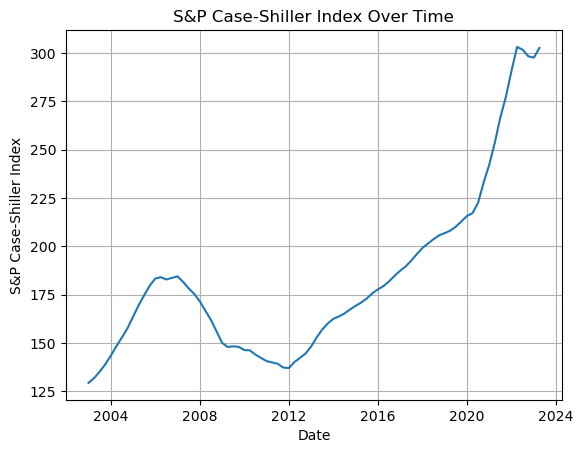

In [419]:
plt.plot(working_data['DATE - yyyy/mm/dd'], working_data['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)'])
plt.xlabel('Date') # x - axis
plt.ylabel('S&P Case-Shiller Index') # y - axis
plt.title('S&P Case-Shiller Index Over Time') # Title of plot
plt.grid(True)
plt.show() # Display the plot

In [420]:

exclude_columns = ['DATE - yyyy/mm/dd', 'S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)']

# Loop through the columns and rename them
for column in working_data.columns:
    if column not in exclude_columns:
        working_data = working_data.rename(columns={column: f'normalized_{column.replace(" ", "-")}'})


In [421]:
working_data

,DATE - yyyy/mm/dd,normalized_GDP-(Billions),normalized_Inflation-Rate,normalized_15-Year-Fixed-Rate-Mortgage-(percent),normalized_30-Year-Fixed-Rate-Mortgage-(percent),normalized_Inflation-Rate-(5Y-Breakeven),normalized_Inflation-Rate-(7Y-Breakeven),normalized_Interest-Rates---Long-Term-Government-Bond-Yield-10-yrs,normalized_Real-Residential-Property-Prices-(Index-2010-=-100),normalized_All-Transactions-House-Price-Index,...,normalized_USA\n\n(SA),normalized_Personal-Income:-Per-Capita-,normalized_Real-Estate-Loans---Commercial--(Billions),normalized_GDP-per-capita,S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100),normalized_Unemployment-(Thousands),normalized_Employment-Private,normalized_Employees-government,normalized_Residential-Real-Estate-Loans-(Billions),normalized_Inflation-expectation
0,2003-01-01,-1.564605,-0.603687,0.908755,0.995290,-0.590676,-0.708305,0.897555,-0.525783,-1.224072,...,-1.093341,-1.446193,-5.136690e-16,-1.704312,129.321333,-0.220216,-1.184580,-1.529529,-1.788040,-0.554711
1,2003-04-01,-1.530292,-1.006971,0.629772,0.696841,-0.875839,-0.988012,0.625401,-0.422604,-1.184554,...,-1.048667,-1.364465,-5.136690e-16,-1.623877,131.755667,-0.075801,-1.211747,-1.622477,-1.652989,-1.397050
2,2003-07-01,-1.467451,-0.138030,1.034871,1.167896,-0.233158,-0.239797,1.181805,-0.281796,-1.134173,...,-0.998283,-1.232971,-5.136690e-16,-1.451447,135.013333,-0.101362,-1.207295,-1.698249,-1.519144,-1.163067
3,2003-10-01,-1.416573,0.500467,0.945152,1.065482,0.183054,0.298638,1.230188,-0.085451,-1.040115,...,-0.935974,-1.230139,-5.136690e-16,-1.337297,138.835000,-0.231109,-1.162682,-1.752805,-1.348698,-0.741897
4,2004-01-01,-1.379147,0.610599,0.654453,0.777814,0.479753,0.571351,0.988273,0.068393,-0.986268,...,-0.868291,-1.206511,-5.136690e-16,-1.290818,143.299000,-0.295497,-1.109392,-1.715424,-1.107820,-0.601508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2022-04-01,1.992031,1.655208,0.284546,0.481599,2.091773,1.976876,-0.000553,1.877164,2.679119,...,2.615789,1.250022,1.865665e+00,1.827360,303.088000,-1.065134,1.695902,-0.041361,-1.555860,3.048628
78,2022-07-01,2.103498,0.874730,0.640600,0.800679,1.196410,1.144749,0.159715,1.699085,2.800563,...,2.663151,1.336686,2.062057e+00,1.908036,301.625667,-1.106442,1.856817,0.281935,-1.525673,2.440272
79,2022-10-01,2.205905,0.667720,1.533601,1.731787,0.896841,0.872036,0.815909,1.664645,2.744521,...,2.671212,1.383295,2.256017e+00,1.985340,298.269333,-1.077753,1.973983,0.548653,-1.497826,2.253086
80,2023-01-01,2.306192,0.542383,1.206847,1.470472,0.795558,0.753161,0.649593,1.674475,2.776644,...,2.686831,1.677758,2.442609e+00,2.056383,297.530333,-1.110756,2.078200,1.157863,-1.489511,0.989577


In [422]:
working_data = working_data.rename(columns={'Normalized-GDP': 'Normalized GDP'})
working_data = working_data.rename(columns={'normalized_15-Year-Fixed-Rate-Mortgage-(percent)': 'normalized_15-Year-Fixed-Rate-Mortgage'})
working_data = working_data.rename(columns={'normalized_30_Year-Fixed-Rate-Mortgage-(percent)': 'normalized_30-Year-Fixed-Rate-Mortgage'})
working_data = working_data.rename(columns={'normalized_Population---Thousands': 'normalized_Population'})
working_data = working_data.rename(columns={'normalized_Personal-Income:-Per-Capita-': 'normalized_Personal-Income-per-capita'})
working_data = working_data.rename(columns={'normalized_Real-Estate-Loans---Commercial--(Billions)': 'normalized_Real-Estate-Loans-Commercial'})
working_data = working_data.rename(columns={'normalized_Unemployment-(Thousands)': 'normalized_Unemployment'})
working_data = working_data.rename(columns={'normalized_USA\n\n(NSA)': 'normalized_Purchase-Only-Index-Non-seasonally-adjusted'})
working_data = working_data.rename(columns={'normalized_USA\n\n(SA)': 'normalized_Purchase-Only-Index-Seasonally-adjusted'})


In [423]:
working_data

,DATE - yyyy/mm/dd,normalized_GDP-(Billions),normalized_Inflation-Rate,normalized_15-Year-Fixed-Rate-Mortgage,normalized_30-Year-Fixed-Rate-Mortgage-(percent),normalized_Inflation-Rate-(5Y-Breakeven),normalized_Inflation-Rate-(7Y-Breakeven),normalized_Interest-Rates---Long-Term-Government-Bond-Yield-10-yrs,normalized_Real-Residential-Property-Prices-(Index-2010-=-100),normalized_All-Transactions-House-Price-Index,...,normalized_Purchase-Only-Index-Seasonally-adjusted,normalized_Personal-Income-per-capita,normalized_Real-Estate-Loans-Commercial,normalized_GDP-per-capita,S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100),normalized_Unemployment,normalized_Employment-Private,normalized_Employees-government,normalized_Residential-Real-Estate-Loans-(Billions),normalized_Inflation-expectation
0,2003-01-01,-1.564605,-0.603687,0.908755,0.995290,-0.590676,-0.708305,0.897555,-0.525783,-1.224072,...,-1.093341,-1.446193,-5.136690e-16,-1.704312,129.321333,-0.220216,-1.184580,-1.529529,-1.788040,-0.554711
1,2003-04-01,-1.530292,-1.006971,0.629772,0.696841,-0.875839,-0.988012,0.625401,-0.422604,-1.184554,...,-1.048667,-1.364465,-5.136690e-16,-1.623877,131.755667,-0.075801,-1.211747,-1.622477,-1.652989,-1.397050
2,2003-07-01,-1.467451,-0.138030,1.034871,1.167896,-0.233158,-0.239797,1.181805,-0.281796,-1.134173,...,-0.998283,-1.232971,-5.136690e-16,-1.451447,135.013333,-0.101362,-1.207295,-1.698249,-1.519144,-1.163067
3,2003-10-01,-1.416573,0.500467,0.945152,1.065482,0.183054,0.298638,1.230188,-0.085451,-1.040115,...,-0.935974,-1.230139,-5.136690e-16,-1.337297,138.835000,-0.231109,-1.162682,-1.752805,-1.348698,-0.741897
4,2004-01-01,-1.379147,0.610599,0.654453,0.777814,0.479753,0.571351,0.988273,0.068393,-0.986268,...,-0.868291,-1.206511,-5.136690e-16,-1.290818,143.299000,-0.295497,-1.109392,-1.715424,-1.107820,-0.601508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2022-04-01,1.992031,1.655208,0.284546,0.481599,2.091773,1.976876,-0.000553,1.877164,2.679119,...,2.615789,1.250022,1.865665e+00,1.827360,303.088000,-1.065134,1.695902,-0.041361,-1.555860,3.048628
78,2022-07-01,2.103498,0.874730,0.640600,0.800679,1.196410,1.144749,0.159715,1.699085,2.800563,...,2.663151,1.336686,2.062057e+00,1.908036,301.625667,-1.106442,1.856817,0.281935,-1.525673,2.440272
79,2022-10-01,2.205905,0.667720,1.533601,1.731787,0.896841,0.872036,0.815909,1.664645,2.744521,...,2.671212,1.383295,2.256017e+00,1.985340,298.269333,-1.077753,1.973983,0.548653,-1.497826,2.253086
80,2023-01-01,2.306192,0.542383,1.206847,1.470472,0.795558,0.753161,0.649593,1.674475,2.776644,...,2.686831,1.677758,2.442609e+00,2.056383,297.530333,-1.110756,2.078200,1.157863,-1.489511,0.989577


In [424]:
working_data.dtypes


DATE - yyyy/mm/dd                                                     datetime64[ns]
normalized_GDP-(Billions)                                                    float64
normalized_Inflation-Rate                                                    float64
normalized_15-Year-Fixed-Rate-Mortgage                                       float64
normalized_30-Year-Fixed-Rate-Mortgage-(percent)                             float64
normalized_Inflation-Rate-(5Y-Breakeven)                                     float64
normalized_Inflation-Rate-(7Y-Breakeven)                                     float64
normalized_Interest-Rates---Long-Term-Government-Bond-Yield-10-yrs           float64
normalized_Real-Residential-Property-Prices-(Index-2010-=-100)               float64
normalized_All-Transactions-House-Price-Index                                float64
normalized_Employment-Level-(Thousands)                                      float64
normalized_Households---Owners-Equity-in-Real-Estate-(-Billions) 

In [425]:

# pd.set_option('display.max_rows', None)  # This prevents truncation of the output
# print(working_data['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)'])


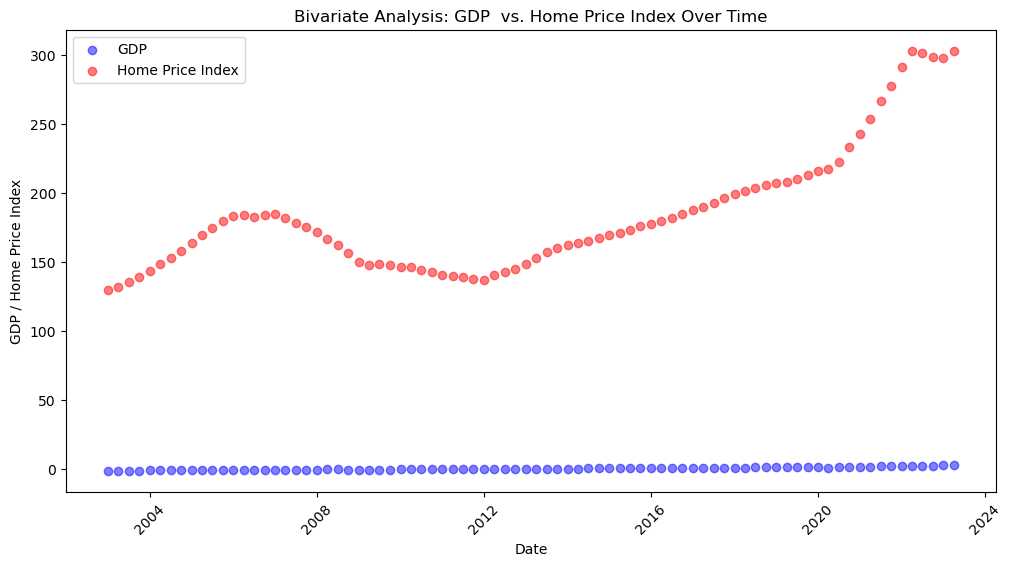

Correlation coefficient between GDP and Home Price Index: 0.878763755028531


In [426]:

# Select the key feature
feature_name = 'normalized_GDP-(Billions)'

# Create a scatter plot with date
plt.figure(figsize=(12, 6)) # size of plot
plt.scatter(working_data['DATE - yyyy/mm/dd'], working_data[feature_name], alpha=0.5, c='blue', label='GDP')
plt.scatter(working_data['DATE - yyyy/mm/dd'], working_data['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)'], alpha=0.5, c='red', label='Home Price Index')
plt.title(f'Bivariate Analysis: GDP  vs. Home Price Index Over Time')
plt.xlabel('Date')
plt.ylabel('GDP / Home Price Index')
plt.legend()
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Calculate the correlation coefficient
correlation = working_data[feature_name].corr(working_data['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)'])
print(f'Correlation coefficient between GDP and Home Price Index: {correlation}')

Correlation coefficient : 0.878

Finding :- 
There is a strong positive relationship between these two factors. In simpler terms, as the GDP increases, home prices tend to increase, and vice versa.
This indicates that GDP is one of the factors that influence home prices .

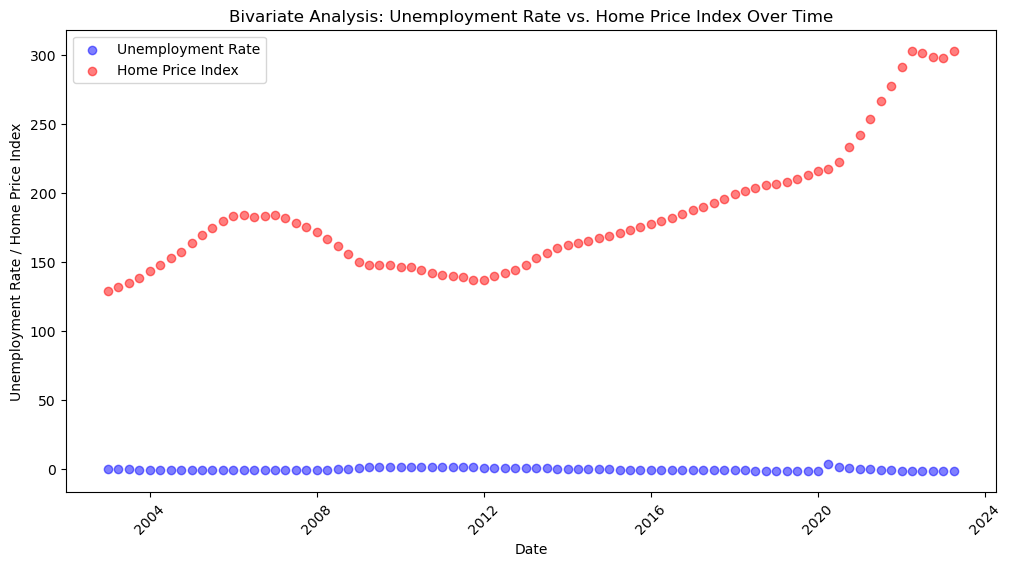

Correlation coefficient between Unemployment Rate and Home Price Index: -0.4811910599848611


In [427]:

# Select the key feature
feature_name = 'normalized_Unemployment'

# Create a scatter plot with date
plt.figure(figsize=(12, 6))
plt.scatter(working_data['DATE - yyyy/mm/dd'], working_data[feature_name], alpha=0.5, c='blue', label='Unemployment Rate')
plt.scatter(working_data['DATE - yyyy/mm/dd'], working_data['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)'], alpha=0.5, c='red', label='Home Price Index')
plt.title(f'Bivariate Analysis: Unemployment Rate vs. Home Price Index Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate / Home Price Index')
plt.legend()
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Calculate the correlation coefficient
correlation = working_data[feature_name].corr(working_data['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)'])
print(f'Correlation coefficient between Unemployment Rate and Home Price Index: {correlation}')


Correlation Coefficient: -0.481.

Finding :- 
There is a moderately negative relationship between these two factors. In simpler terms, as the unemployment rate    increases, home prices tend to decrease, and vice versa.
Allbeit, relationship is not extremely strong, indicating that other factors also influence home prices.

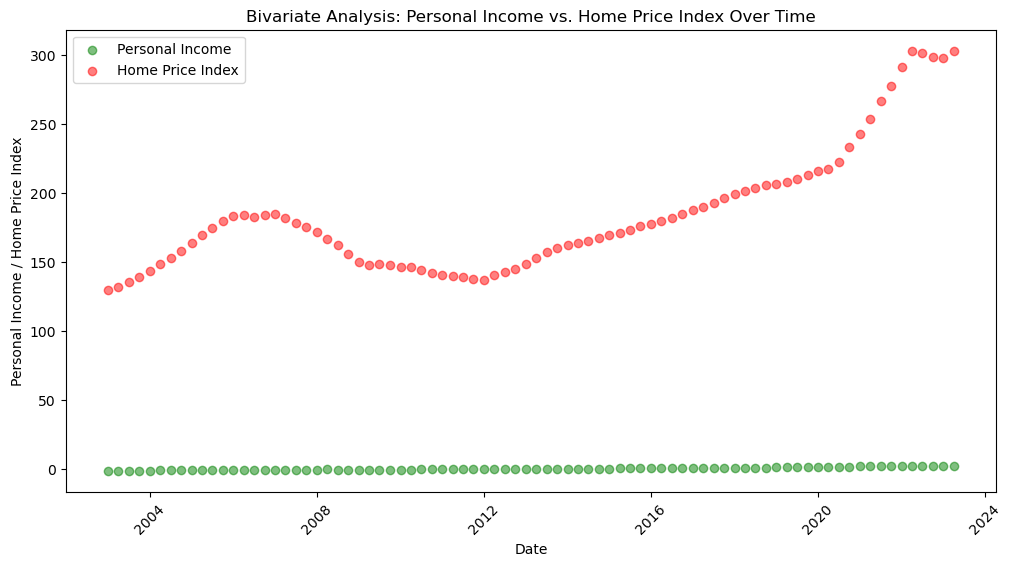

Correlation coefficient between Personal Income and Home Price Index: 0.8650226163594186


In [428]:
feature_name = 'normalized_Personal-Income-(Billions)'

# Scatter plot with date
plt.figure(figsize=(12, 6))
plt.scatter(working_data['DATE - yyyy/mm/dd'], working_data[feature_name], alpha=0.5, c='green', label='Personal Income')
plt.scatter(working_data['DATE - yyyy/mm/dd'], working_data['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)'], alpha=0.5, c='red', label='Home Price Index')
plt.title(f'Bivariate Analysis: Personal Income vs. Home Price Index Over Time')
plt.xlabel('Date')
plt.ylabel('Personal Income / Home Price Index')
plt.legend()
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Calculating the correlation coefficient
correlation = working_data[feature_name].corr(working_data['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)'])
print(f'Correlation coefficient between Personal Income and Home Price Index: {correlation}')


Correlation coefficient : 0.865

Finding :- This is strong positive relationship between Personal Income and Home Price Index.
Thus, as personal income goes up, home prices tend to rise as well. 
This suggests that there's a significant connection between people's income and the price of homes, with income growth often been one of the driving factors in increasing prices.

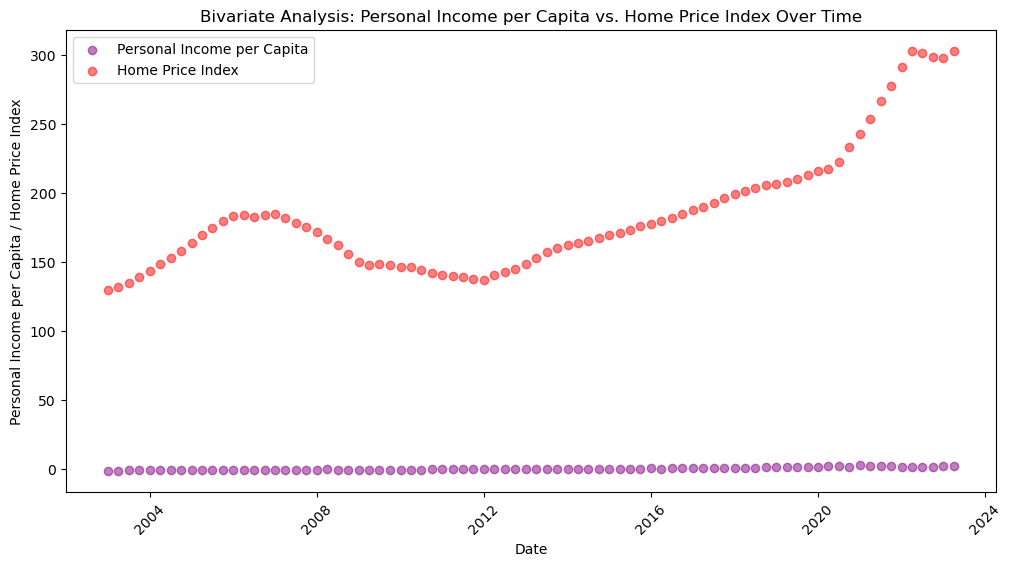

Correlation coefficient between Personal Income per Capita and Home Price Index: 0.8221378478773007


In [429]:
# Select the key feature
feature_name = 'normalized_Personal-Income-per-capita'

# Create a scatter plot with date
plt.figure(figsize=(12, 6))
plt.scatter(working_data['DATE - yyyy/mm/dd'], working_data[feature_name], alpha=0.5, c='purple', label='Personal Income per Capita')
plt.scatter(working_data['DATE - yyyy/mm/dd'], working_data['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)'], alpha=0.5, c='red', label='Home Price Index')
plt.title(f'Bivariate Analysis: Personal Income per Capita vs. Home Price Index Over Time')
plt.xlabel('Date')
plt.ylabel('Personal Income per Capita / Home Price Index')
plt.legend()
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Calculate the correlation coefficient
correlation = working_data[feature_name].corr(working_data['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)'])
print(f'Correlation coefficient between Personal Income per Capita and Home Price Index: {correlation}')


Correlation coefficient :0.822

Finding :- This is strong positive relationship between Personal Income per capita and Home Price Index.
Thus, as personal income per capita goes up, home prices tend to rise as well. 
This suggests that there's a significant connection between people's income and the price of homes, with income growth often been one of the driving factors in increasing prices.

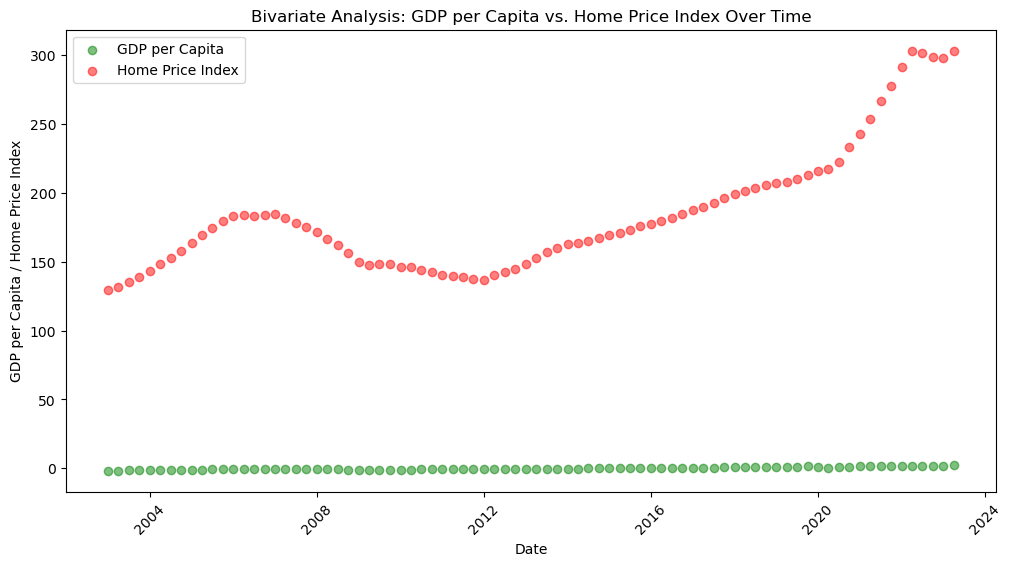

Correlation coefficient between GDP per Capita and Home Price Index: 0.9040889598683658


In [430]:
# Select the key feature
feature_name = 'normalized_GDP-per-capita'

# Create a scatter plot with date
plt.figure(figsize=(12, 6))
plt.scatter(working_data['DATE - yyyy/mm/dd'], working_data[feature_name], alpha=0.5, c='green', label='GDP per Capita')
plt.scatter(working_data['DATE - yyyy/mm/dd'], working_data['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)'], alpha=0.5, c='red', label='Home Price Index')
plt.title(f'Bivariate Analysis: GDP per Capita vs. Home Price Index Over Time')
plt.xlabel('Date')
plt.ylabel('GDP per Capita / Home Price Index')
plt.legend()
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Calculate the correlation coefficient
correlation = working_data[feature_name].corr(working_data['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)'])
print(f'Correlation coefficient between GDP per Capita and Home Price Index: {correlation}')


Correlation coefficient : 0.904 

Finding :- This suggests a strong positive relationship between GDP per capita and the Home Price Index
This means, as the economy improves and GDP per person increases, home prices tend to rise significantly. 


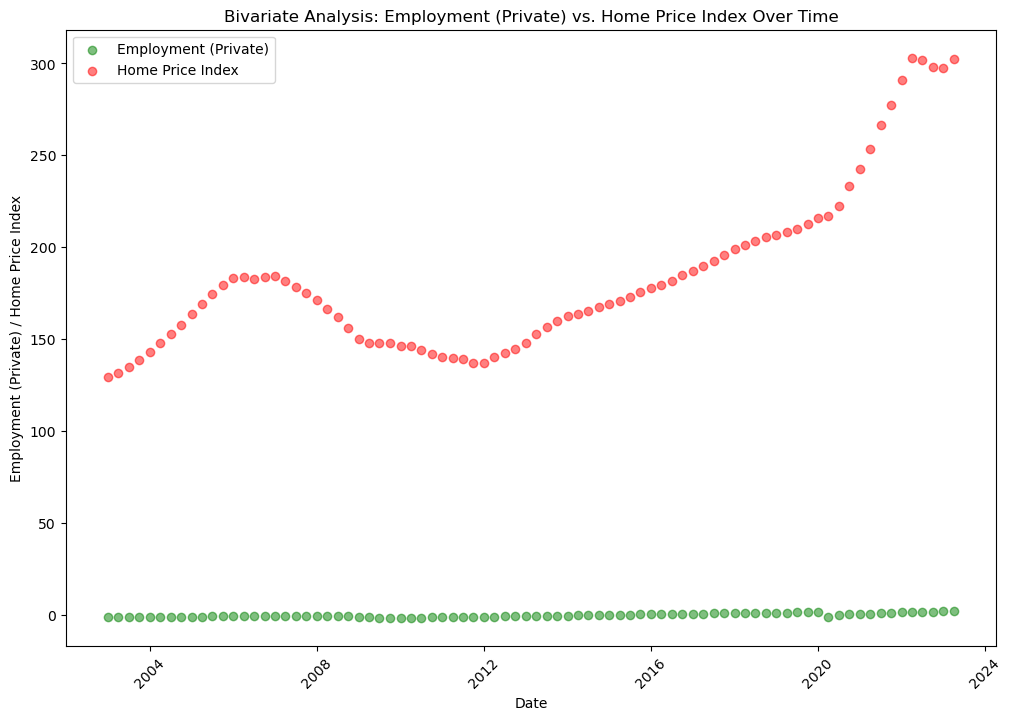

Correlation coefficient between Employment (Private) and Home Price Index: 0.8457956616798613


In [431]:

# Select the key feature
feature_name = 'normalized_Employment-Private'

# Create a scatter plot with date
plt.figure(figsize=(12, 8))
plt.scatter(working_data['DATE - yyyy/mm/dd'], working_data[feature_name], alpha=0.5, c='green', label='Employment (Private)')
plt.scatter(working_data['DATE - yyyy/mm/dd'], working_data['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)'], alpha=0.5, c='red', label='Home Price Index')
plt.title(f'Bivariate Analysis: Employment (Private) vs. Home Price Index Over Time')
plt.xlabel('Date')
plt.ylabel('Employment (Private) / Home Price Index')
plt.legend()
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Calculate the correlation coefficient
correlation = working_data[feature_name].corr(working_data['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)'])
print(f'Correlation coefficient between Employment (Private) and Home Price Index: {correlation}')


Correlation coefficient : 0.845

Finding :-
This strong positive correlation indicates a significant relationship between changes in private employment and changes in home prices. 
When private employment increases, home prices tend to rise as well, and when private employment decreases, home prices are likely to decrease. 

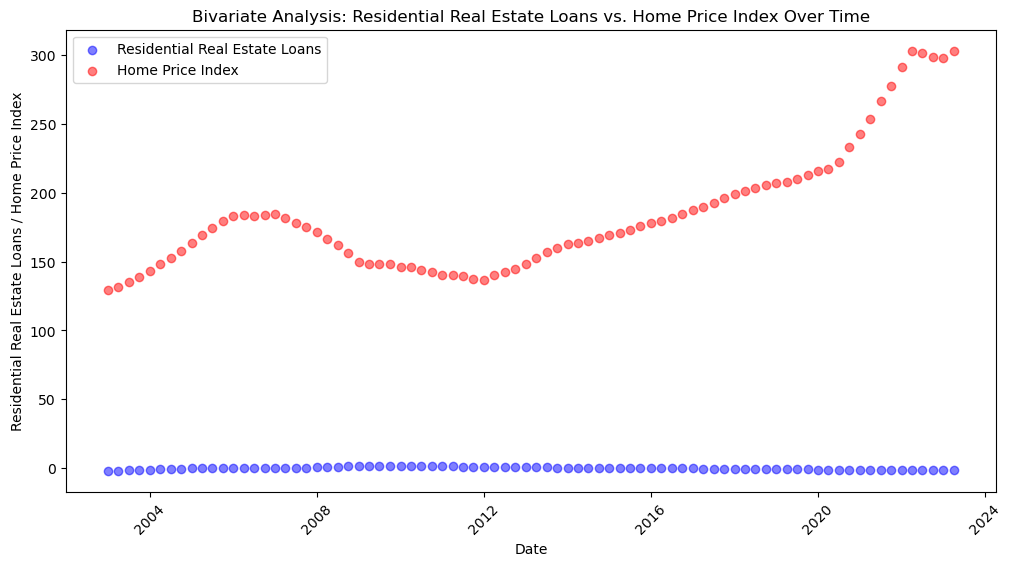

Correlation coefficient between Residential Real Estate Loans and Home Price Index: -0.6718049331825973


In [432]:

# Create a scatter plot for the second feature
feature_name = 'normalized_Residential-Real-Estate-Loans-(Billions)'

plt.figure(figsize=(12, 6))
plt.scatter(working_data['DATE - yyyy/mm/dd'], working_data[feature_name], alpha=0.5, c='blue', label='Residential Real Estate Loans')
plt.scatter(working_data['DATE - yyyy/mm/dd'], working_data['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)'], alpha=0.5, c='red', label='Home Price Index')
plt.title(f'Bivariate Analysis: Residential Real Estate Loans vs. Home Price Index Over Time')
plt.xlabel('Date')
plt.ylabel('Residential Real Estate Loans / Home Price Index')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Calculate the correlation coefficient for the second feature
correlation = working_data[feature_name].corr(working_data['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)'])
print(f'Correlation coefficient between Residential Real Estate Loans and Home Price Index: {correlation}')


Correlation Co-efficient : -0.6718

Finding :-
The negative sign indicates that as Residential Real Estate Loans increases, Home Price Index tends to decrease. In simpler terms, when the amount of Residential Real Estate Loans goes up, home prices generally tend to go down, and vice versa.

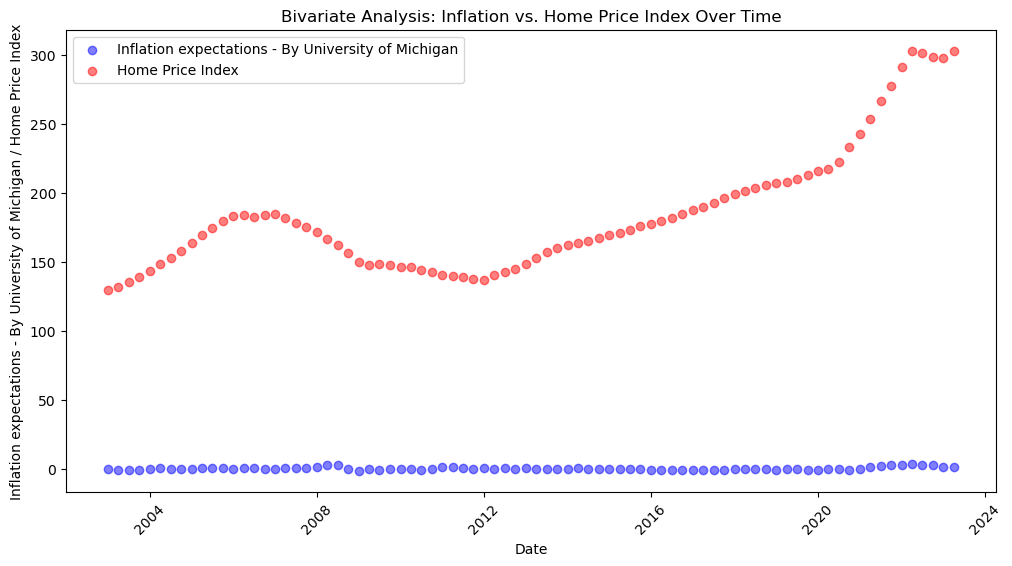

Correlation coefficient between Inflation expectations - By University of Michigan and Home Price Index: 0.5265699458587418


In [433]:
feature_name = 'normalized_Inflation-expectation'

plt.figure(figsize=(12, 6))
plt.scatter(working_data['DATE - yyyy/mm/dd'], working_data[feature_name], alpha=0.5, c='blue', label='Inflation expectations - By University of Michigan')
plt.scatter(working_data['DATE - yyyy/mm/dd'], working_data['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)'], alpha=0.5, c='red', label='Home Price Index')
plt.title(f'Bivariate Analysis: Inflation vs. Home Price Index Over Time')
plt.xlabel('Date')
plt.ylabel('Inflation expectations - By University of Michigan / Home Price Index')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Calculate the correlation coefficient for the second feature
correlation = working_data[feature_name].corr(working_data['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)'])
print(f'Correlation coefficient between Inflation expectations - By University of Michigan and Home Price Index: {correlation}')


Correlation coefficient : 0.526

Finding :-
The coefficient suggests moderately positive relationship between inflation and Home price index
When inflation increases, home prices tend to rise as well, and when inflation decreases, home prices are likely to decrease. 

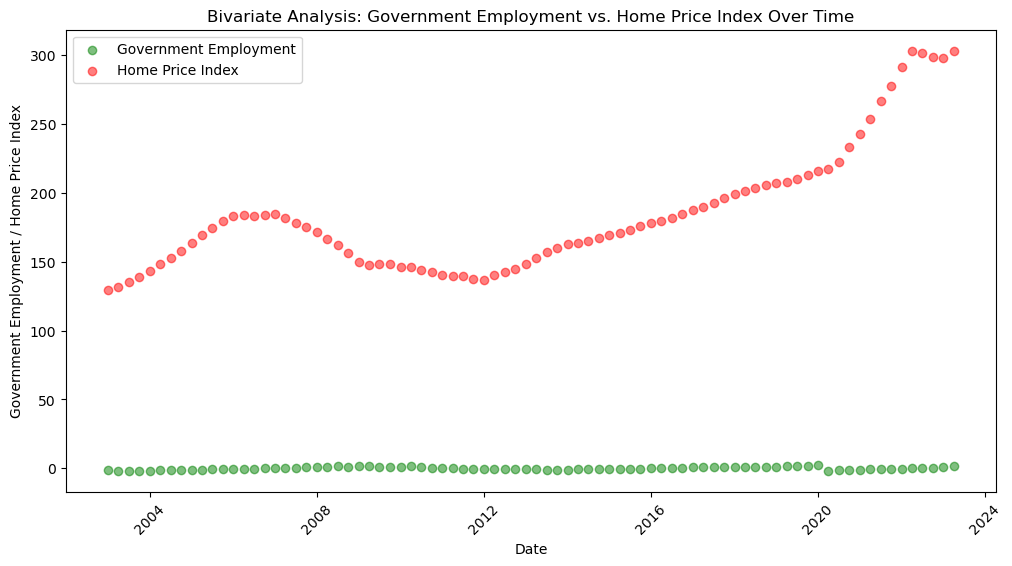

Correlation coefficient between Government Employment and Home Price Index: 0.23204715619752436


In [434]:

# Select the key feature
feature_name = 'normalized_Employees-government'

# Create a scatter plot with date
plt.figure(figsize=(12, 6))
plt.scatter(working_data['DATE - yyyy/mm/dd'], working_data[feature_name], alpha=0.5, c='green', label='Government Employment')
plt.scatter(working_data['DATE - yyyy/mm/dd'], working_data['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)'], alpha=0.5, c='red', label='Home Price Index')
plt.title(f'Bivariate Analysis: Government Employment vs. Home Price Index Over Time')
plt.xlabel('Date')
plt.ylabel('Government Employment / Home Price Index')
plt.legend()
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Calculate the correlation coefficient
correlation = working_data[feature_name].corr(working_data['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)'])
print(f'Correlation coefficient between Government Employment and Home Price Index: {correlation}')


The correlation coefficient of 0.232

Finding :- 
This suggest a weak relationship between Home Price Index (S&P) and Government Employment
In simpler terms, when the Government Employments goes up, home prices generally tend to go up by bit and not much, and vice versa.

In [435]:
# Way to drop column
# working_data.drop('normalized_Employees-government', axis=1, inplace=True)

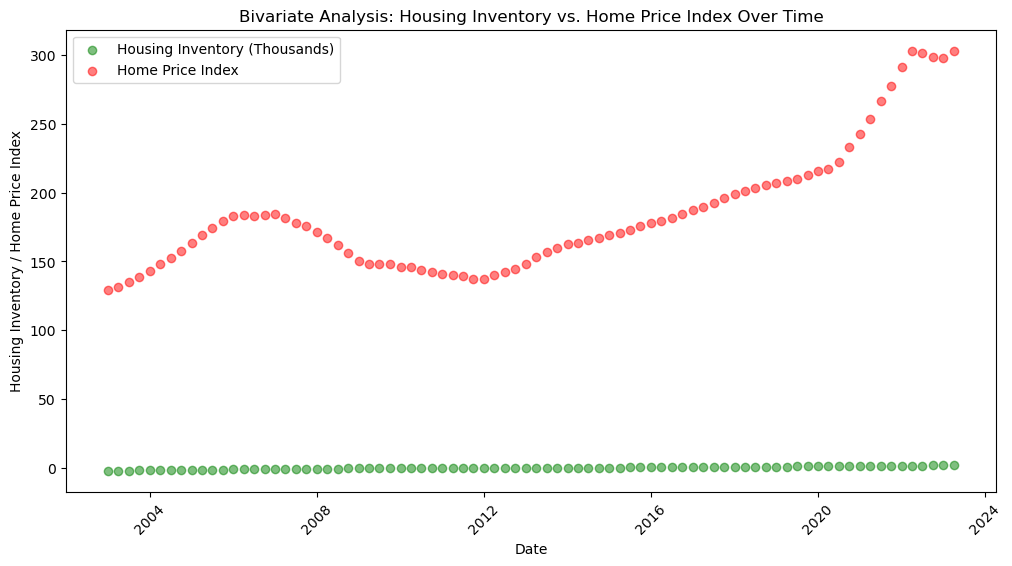

Correlation coefficient between Housing Inventory and Home Price Index: 0.7766751881036587


In [436]:


feature_name = 'normalized_Housing-Inventory-Estimate-(Thousands)'

plt.figure(figsize=(12, 6))
plt.scatter(working_data['DATE - yyyy/mm/dd'], working_data[feature_name], alpha=0.5, c='green', label='Housing Inventory (Thousands)')
plt.scatter(working_data['DATE - yyyy/mm/dd'], working_data['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)'], alpha=0.5, c='red', label='Home Price Index')
plt.title(f'Bivariate Analysis: Housing Inventory vs. Home Price Index Over Time')
plt.xlabel('Date')
plt.ylabel('Housing Inventory / Home Price Index')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Calculate the correlation coefficient
correlation = working_data[feature_name].corr(working_data['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)'])
print(f'Correlation coefficient between Housing Inventory and Home Price Index: {correlation}')


The correlation coefficient : 0.777 

Finding :- This indicates a strong positive relationship. 
So, as the number of homes available in the market (housing inventory) increases, home prices tend to rise. 
This indicates that a larger supply of homes often means higher home prices, reflecting the principle of supply and demand in the housing market.

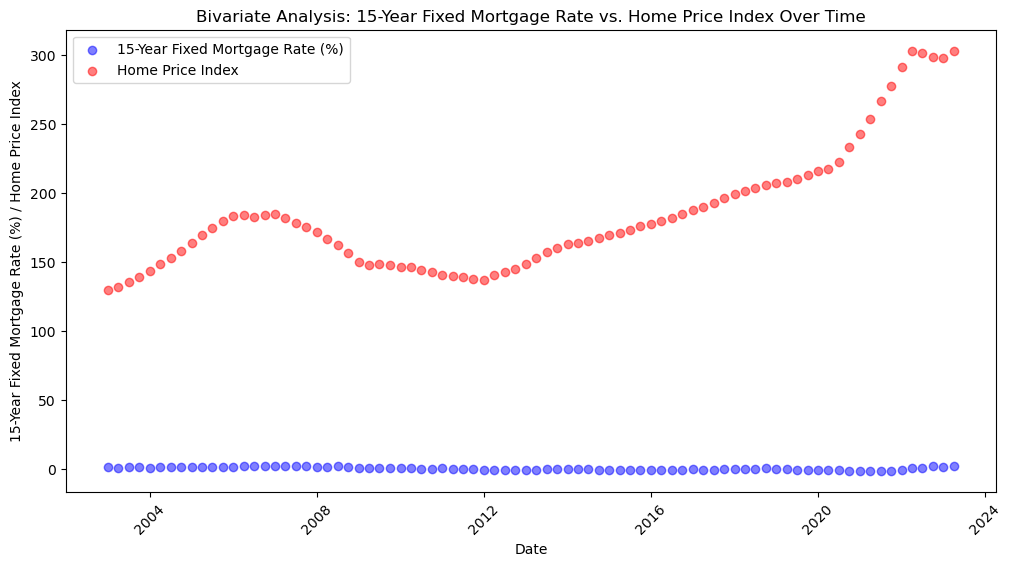

Correlation coefficient between 15-Year Fixed Mortgage Rate and Home Price Index: -0.09245202881182686


In [437]:
import matplotlib.pyplot as plt

# Select the key feature
feature_name = 'normalized_15-Year-Fixed-Rate-Mortgage'

# Create a scatter plot with date
plt.figure(figsize=(12, 6))
plt.scatter(working_data['DATE - yyyy/mm/dd'], working_data[feature_name], alpha=0.5, c='blue', label='15-Year Fixed Mortgage Rate (%)')
plt.scatter(working_data['DATE - yyyy/mm/dd'], working_data['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)'], alpha=0.5, c='red', label='Home Price Index')
plt.title(f'Bivariate Analysis: 15-Year Fixed Mortgage Rate vs. Home Price Index Over Time')
plt.xlabel('Date')
plt.ylabel('15-Year Fixed Mortgage Rate (%) / Home Price Index')
plt.legend()
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Calculate the correlation coefficient
correlation = working_data[feature_name].corr(working_data['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)'])
print(f'Correlation coefficient between 15-Year Fixed Mortgage Rate and Home Price Index: {correlation}')


Correlation coefficient : -0.092 
This indicates weak negative relationship.
When 15-Year Fixed Mortgage Rates rise, home prices may decrease slightly, and when rates fall, home prices might rise slightly.
This correlation suggests that while there is a connection between mortgage rates and home prices, it's relatively weak

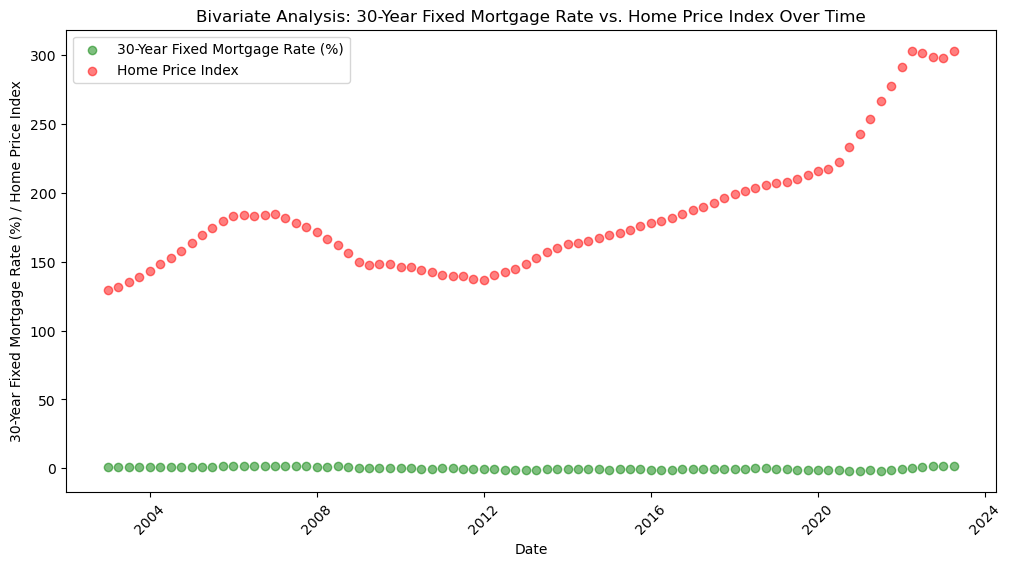

Correlation coefficient between 30-Year Fixed Mortgage Rate and Home Price Index: -0.09289835499448669


In [438]:

# Select the key feature
feature_name = 'normalized_30-Year-Fixed-Rate-Mortgage-(percent)'

# Create a scatter plot with date
plt.figure(figsize=(12, 6))
plt.scatter(working_data['DATE - yyyy/mm/dd'], working_data[feature_name], alpha=0.5, c='green', label='30-Year Fixed Mortgage Rate (%)')
plt.scatter(working_data['DATE - yyyy/mm/dd'], working_data['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)'], alpha=0.5, c='red', label='Home Price Index')
plt.title(f'Bivariate Analysis: 30-Year Fixed Mortgage Rate vs. Home Price Index Over Time')
plt.xlabel('Date')
plt.ylabel('30-Year Fixed Mortgage Rate (%) / Home Price Index')
plt.legend()
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Calculate the correlation coefficient
correlation = working_data[feature_name].corr(working_data['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)'])
print(f'Correlation coefficient between 30-Year Fixed Mortgage Rate and Home Price Index: {correlation}')


Correlation coefficient : -0.092 
This indicates weak negative relationship.
When 30-Year Fixed Mortgage Rates rise, home prices may decrease slightly, and when rates fall, home prices might rise slightly.
This correlation suggests that while there is a connection between mortgage rates and home prices, it's relatively weak

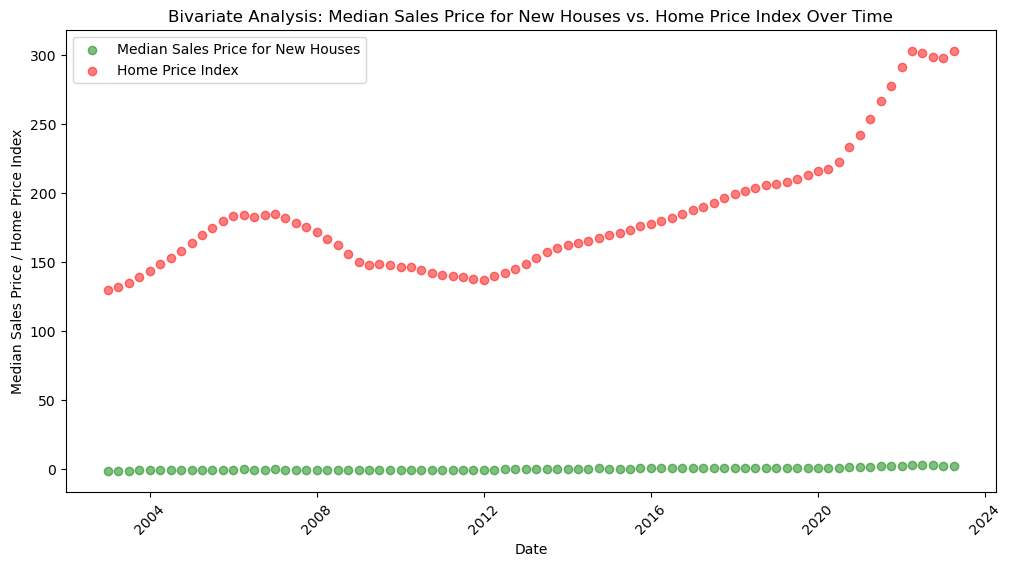

Correlation coefficient between Median Sales Price for New Houses and Home Price Index: 0.9438349280195825


In [439]:
feature_name = 'normalized_Median-Sales-Price-for-New-Houses'

# Create a scatter plot with date
plt.figure(figsize=(12, 6))
plt.scatter(working_data['DATE - yyyy/mm/dd'], working_data[feature_name], alpha=0.5, c='green', label='Median Sales Price for New Houses')
plt.scatter(working_data['DATE - yyyy/mm/dd'], working_data['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)'], alpha=0.5, c='red', label='Home Price Index')
plt.title(f'Bivariate Analysis: Median Sales Price for New Houses vs. Home Price Index Over Time')
plt.xlabel('Date')
plt.ylabel('Median Sales Price / Home Price Index')
plt.legend()
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Calculate the correlation coefficient
correlation = working_data[feature_name].corr(working_data['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)'])
print(f'Correlation coefficient between Median Sales Price for New Houses and Home Price Index: {correlation}')


The high correlation coefficient of 0.9438 indicates a strong positive relationship between Median Sales Price for New Houses and the Home Price Index. This suggests that as the Home Price Index increases, the Median Sales Price for New Houses tends to rise consistently. 

Performing OLS (Ordinary Least Squares) regression and RLM (Robust Linear Model) regression 

Reason :-) 
Reason for OLS :
Used for initial modeling and interpretation of linear relationships between variables.
It also estimates p-values for each independant variable

Reason for RLM :-)
it can offer more accurate results when dealing with non-normally distributed errors or outliers and it is highly robust


In [440]:
import statsmodels.api as sm
import scipy.stats as stats

independent_vars = [
    'normalized_GDP-(Billions)',
    'normalized_Population',
    'normalized_Personal-Income-per-capita',
    'normalized_GDP-per-capita'
]
working_data['intercept'] = 1

model = sm.OLS(working_data['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)'], working_data[independent_vars + ['intercept']])
results = model.fit()

# Display results of OLS regression
print(results.summary())

print("\n=======================================================================================================================\n")

# Perform a robust linear regression using Huber loss
robust_model = sm.RLM(working_data['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)'], working_data[independent_vars + ['intercept']], M=sm.robust.norms.HuberT())
robust_results = robust_model.fit()

# Display the summary of the robust regression
print(robust_results.summary())


                                                   OLS Regression Results                                                   
Dep. Variable:     S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)   R-squared:                       0.961
Model:                                                                          OLS   Adj. R-squared:                  0.959
Method:                                                               Least Squares   F-statistic:                     478.8
Date:                                                              Sun, 15 Oct 2023   Prob (F-statistic):           1.54e-53
Time:                                                                      22:28:42   Log-Likelihood:                -294.44
No. Observations:                                                                82   AIC:                             598.9
Df Residuals:                                                                    77   BIC:                             610.9


In [386]:
working_data

,DATE - yyyy/mm/dd,normalized_GDP-(Billions),normalized_Inflation-Rate,normalized_15-Year-Fixed-Rate-Mortgage,normalized_30-Year-Fixed-Rate-Mortgage-(percent),normalized_Inflation-Rate-(5Y-Breakeven),normalized_Inflation-Rate-(7Y-Breakeven),normalized_Interest-Rates---Long-Term-Government-Bond-Yield-10-yrs,normalized_Real-Residential-Property-Prices-(Index-2010-=-100),normalized_All-Transactions-House-Price-Index,...,normalized_Real-Estate-Loans-Commercial,normalized_GDP-per-capita,S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100),normalized_Unemployment,normalized_Employment-Private,normalized_Employees-government,normalized_Residential-Real-Estate-Loans-(Billions),normalized_Inflation-expectation,intercept,lagged_population
0,2003-01-01,-1.564605,-0.603687,0.908755,0.995290,-0.590676,-0.708305,0.897555,-0.525783,-1.224072,...,-0.166333,-1.704312,129.321333,-0.220216,-1.184580,-1.529529,-1.788040,-0.554711,1,0.064169
1,2003-04-01,-1.530292,-1.006971,0.629772,0.696841,-0.875839,-0.988012,0.625401,-0.422604,-1.184554,...,-0.166333,-1.623877,131.755667,-0.075801,-1.211747,-1.622477,-1.652989,-1.397050,1,-1.852852
2,2003-07-01,-1.467451,-0.138030,1.034871,1.167896,-0.233158,-0.239797,1.181805,-0.281796,-1.134173,...,-0.166333,-1.451447,135.013333,-0.101362,-1.207295,-1.698249,-1.519144,-1.163067,1,-1.806418
3,2003-10-01,-1.416573,0.500467,0.945152,1.065482,0.183054,0.298638,1.230188,-0.085451,-1.040115,...,-0.166333,-1.337297,138.835000,-0.231109,-1.162682,-1.752805,-1.348698,-0.741897,1,-1.754431
4,2004-01-01,-1.379147,0.610599,0.654453,0.777814,0.479753,0.571351,0.988273,0.068393,-0.986268,...,-0.166333,-1.290818,143.299000,-0.295497,-1.109392,-1.715424,-1.107820,-0.601508,1,-1.704319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2022-04-01,1.992031,1.655208,0.284546,0.481599,2.091773,1.976876,-0.000553,1.877164,2.679119,...,0.712414,1.827360,303.088000,-1.065134,1.695902,-0.041361,-1.555860,3.048628,1,1.274213
78,2022-07-01,2.103498,0.874730,0.640600,0.800679,1.196410,1.144749,0.159715,1.699085,2.800563,...,0.804917,1.908036,301.625667,-1.106442,1.856817,0.281935,-1.525673,2.440272,1,1.298945
79,2022-10-01,2.205905,0.667720,1.533601,1.731787,0.896841,0.872036,0.815909,1.664645,2.744521,...,0.896273,1.985340,298.269333,-1.077753,1.973983,0.548653,-1.497826,2.253086,1,1.333410
80,2023-01-01,2.306192,0.542383,1.206847,1.470472,0.795558,0.753161,0.649593,1.674475,2.776644,...,0.984160,2.056383,297.530333,-1.110756,2.078200,1.157863,-1.489511,0.989577,1,1.368236


Feature engineering - creating Lag for population

In [357]:
lag_periods = 1  # Adjust the lag period as needed
working_data['lagged_population'] = working_data['normalized_Population'].shift(lag_periods)


In [358]:


working_data['lagged_population'] = working_data['lagged_population'].fillna(working_data['lagged_population'].median())


In [441]:
correlations = working_data.corr(numeric_only=True)
correlations['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)'].abs().sort_values(ascending=False)


S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)      1.000000
normalized_Purchase-Only-Index-Seasonally-adjusted                    0.996163
normalized_Purchase-Only-Index-Non-seasonally-adjusted                0.995355
normalized_All-Transactions-House-Price-Index                         0.992090
normalized_Households---Owners-Equity-in-Real-Estate-(-Billions)      0.988966
normalized_Median-Sales-Price-for-New-Houses                          0.943835
normalized_GDP-per-capita                                             0.904089
normalized_GDP-(Billions)                                             0.878764
normalized_Personal-Income-(Billions)                                 0.865023
normalized_Employment-Private                                         0.845796
normalized_Real-Estate-Loans-Commercial                               0.839598
normalized_Personal-Income-per-capita                                 0.822138
normalized_Employment-Level-(Thousands)             

Feature Selection using correlation values

In [442]:

# Define your correlation threshold (e.g., 0.5 for moderate correlations)
correlation_threshold = 0.5

# Calculate the correlations with the target variable
correlations = working_data.corr()['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)']

# Select features with strong and moderate positive correlations
selected_features = correlations[(correlations >= correlation_threshold) & (correlations < 1)].index.tolist()

# Include the target variable in the selected features
selected_features.append('S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)')

# Create a new dataset with selected features
selected_data = working_data[selected_features]

# Now, 'selected_data' contains the features with strong and moderate positive correlations


C:\Users\Parth\AppData\Local\Temp\ipykernel_19000\2128896162.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = working_data.corr()['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)']


In [443]:
selected_data.columns

Index(['normalized_GDP-(Billions)',
       'normalized_Real-Residential-Property-Prices-(Index-2010-=-100)',
       'normalized_All-Transactions-House-Price-Index',
       'normalized_Employment-Level-(Thousands)',
       'normalized_Households---Owners-Equity-in-Real-Estate-(-Billions)',
       'normalized_Housing-Inventory-Estimate-(Thousands)',
       'normalized_Median-Sales-Price-for-New-Houses',
       'normalized_Personal-Income-(Billions)', 'normalized_Population',
       'normalized_Purchase-Only-Index-Non-seasonally-adjusted',
       'normalized_Purchase-Only-Index-Seasonally-adjusted',
       'normalized_Personal-Income-per-capita',
       'normalized_Real-Estate-Loans-Commercial', 'normalized_GDP-per-capita',
       'normalized_Employment-Private', 'normalized_Inflation-expectation',
       'S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)'],
      dtype='object')

In [444]:
selected_data

,normalized_GDP-(Billions),normalized_Real-Residential-Property-Prices-(Index-2010-=-100),normalized_All-Transactions-House-Price-Index,normalized_Employment-Level-(Thousands),normalized_Households---Owners-Equity-in-Real-Estate-(-Billions),normalized_Housing-Inventory-Estimate-(Thousands),normalized_Median-Sales-Price-for-New-Houses,normalized_Personal-Income-(Billions),normalized_Population,normalized_Purchase-Only-Index-Non-seasonally-adjusted,normalized_Purchase-Only-Index-Seasonally-adjusted,normalized_Personal-Income-per-capita,normalized_Real-Estate-Loans-Commercial,normalized_GDP-per-capita,normalized_Employment-Private,normalized_Inflation-expectation,S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)
0,-1.564605,-0.525783,-1.224072,-1.396864,-0.746120,-2.080979,-1.412492,-1.486341,-1.852852,-1.114478,-1.093341,-1.446193,-5.136690e-16,-1.704312,-1.184580,-0.554711,129.321333
1,-1.530292,-0.422604,-1.184554,-1.365742,-0.723337,-2.009253,-1.319810,-1.459027,-1.806418,-1.050510,-1.048667,-1.364465,-5.136690e-16,-1.623877,-1.211747,-1.397050,131.755667
2,-1.467451,-0.281796,-1.134173,-1.382187,-0.695985,-1.936226,-1.320781,-1.424501,-1.754431,-0.976905,-0.998283,-1.232971,-5.136690e-16,-1.451447,-1.207295,-1.163067,135.013333
3,-1.416573,-0.085451,-1.040115,-1.274831,-0.658705,-1.858645,-1.201895,-1.388002,-1.704319,-0.930549,-0.935974,-1.230139,-5.136690e-16,-1.337297,-1.162682,-0.741897,138.835000
4,-1.379147,0.068393,-0.986268,-1.243022,-0.574385,-1.781715,-1.000518,-1.362010,-1.663364,-0.894826,-0.868291,-1.206511,-5.136690e-16,-1.290818,-1.109392,-0.601508,143.299000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,1.992031,1.877164,2.679119,1.646849,2.810986,1.614616,2.410276,1.821571,1.298945,2.657148,2.615789,1.250022,1.865665e+00,1.827360,1.695902,3.048628,303.088000
78,2.103498,1.699085,2.800563,1.719401,2.565992,1.681137,2.675221,1.917722,1.333410,2.738396,2.663151,1.336686,2.062057e+00,1.908036,1.856817,2.440272,301.625667
79,2.205905,1.664645,2.744521,1.746301,2.394954,1.747658,2.880965,1.986087,1.368236,2.654490,2.671212,1.383295,2.256017e+00,1.985340,1.973983,2.253086,298.269333
80,2.306192,1.674475,2.776644,1.990809,2.337768,1.814017,2.229280,2.085113,1.394122,2.581716,2.686831,1.677758,2.442609e+00,2.056383,2.078200,0.989577,297.530333


In [363]:
working_data

,DATE - yyyy/mm/dd,normalized_GDP-(Billions),normalized_Inflation-Rate,normalized_15-Year-Fixed-Rate-Mortgage,normalized_30-Year-Fixed-Rate-Mortgage-(percent),normalized_Inflation-Rate-(5Y-Breakeven),normalized_Inflation-Rate-(7Y-Breakeven),normalized_Interest-Rates---Long-Term-Government-Bond-Yield-10-yrs,normalized_Real-Residential-Property-Prices-(Index-2010-=-100),normalized_All-Transactions-House-Price-Index,...,normalized_Real-Estate-Loans-Commercial,normalized_GDP-per-capita,S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100),normalized_Unemployment,normalized_Employment-Private,normalized_Employees-government,normalized_Residential-Real-Estate-Loans-(Billions),normalized_Inflation-expectation,intercept,lagged_population
0,2003-01-01,-1.564605,-0.603687,0.908755,0.995290,-0.590676,-0.708305,0.897555,-0.525783,-1.224072,...,-5.136690e-16,-1.704312,129.321333,-0.220216,-1.184580,-1.529529,-1.788040,-0.554711,1,0.064169
1,2003-04-01,-1.530292,-1.006971,0.629772,0.696841,-0.875839,-0.988012,0.625401,-0.422604,-1.184554,...,-5.136690e-16,-1.623877,131.755667,-0.075801,-1.211747,-1.622477,-1.652989,-1.397050,1,-1.852852
2,2003-07-01,-1.467451,-0.138030,1.034871,1.167896,-0.233158,-0.239797,1.181805,-0.281796,-1.134173,...,-5.136690e-16,-1.451447,135.013333,-0.101362,-1.207295,-1.698249,-1.519144,-1.163067,1,-1.806418
3,2003-10-01,-1.416573,0.500467,0.945152,1.065482,0.183054,0.298638,1.230188,-0.085451,-1.040115,...,-5.136690e-16,-1.337297,138.835000,-0.231109,-1.162682,-1.752805,-1.348698,-0.741897,1,-1.754431
4,2004-01-01,-1.379147,0.610599,0.654453,0.777814,0.479753,0.571351,0.988273,0.068393,-0.986268,...,-5.136690e-16,-1.290818,143.299000,-0.295497,-1.109392,-1.715424,-1.107820,-0.601508,1,-1.704319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2022-04-01,1.992031,1.655208,0.284546,0.481599,2.091773,1.976876,-0.000553,1.877164,2.679119,...,1.865665e+00,1.827360,303.088000,-1.065134,1.695902,-0.041361,-1.555860,3.048628,1,1.274213
78,2022-07-01,2.103498,0.874730,0.640600,0.800679,1.196410,1.144749,0.159715,1.699085,2.800563,...,2.062057e+00,1.908036,301.625667,-1.106442,1.856817,0.281935,-1.525673,2.440272,1,1.298945
79,2022-10-01,2.205905,0.667720,1.533601,1.731787,0.896841,0.872036,0.815909,1.664645,2.744521,...,2.256017e+00,1.985340,298.269333,-1.077753,1.973983,0.548653,-1.497826,2.253086,1,1.333410
80,2023-01-01,2.306192,0.542383,1.206847,1.470472,0.795558,0.753161,0.649593,1.674475,2.776644,...,2.442609e+00,2.056383,297.530333,-1.110756,2.078200,1.157863,-1.489511,0.989577,1,1.368236


Normalized real estate loans commercial data is showing anomalies as normalized values cant be as high as 9 or 10
proving data needs to be renormalized is inaccurate

In [446]:
# Min - Max normalization

min_val = working_data['normalized_Real-Estate-Loans-Commercial'].min()
max_val = working_data['normalized_Real-Estate-Loans-Commercial'].max()

# Normalize the column to the range of -1 to 1
working_data['normalized_Real-Estate-Loans-Commercial'] = 2 * (working_data['normalized_Real-Estate-Loans-Commercial'] - min_val) / (max_val - min_val) - 1



In [447]:

selected_data = selected_data.merge(working_data[['normalized_GDP-(Billions)', 'normalized_Residential-Real-Estate-Loans-(Billions)']], on='normalized_GDP-(Billions)', how='inner')


In [448]:
selected_data

,normalized_GDP-(Billions),normalized_Real-Residential-Property-Prices-(Index-2010-=-100),normalized_All-Transactions-House-Price-Index,normalized_Employment-Level-(Thousands),normalized_Households---Owners-Equity-in-Real-Estate-(-Billions),normalized_Housing-Inventory-Estimate-(Thousands),normalized_Median-Sales-Price-for-New-Houses,normalized_Personal-Income-(Billions),normalized_Population,normalized_Purchase-Only-Index-Non-seasonally-adjusted,normalized_Purchase-Only-Index-Seasonally-adjusted,normalized_Personal-Income-per-capita,normalized_Real-Estate-Loans-Commercial,normalized_GDP-per-capita,normalized_Employment-Private,normalized_Inflation-expectation,S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100),normalized_Residential-Real-Estate-Loans-(Billions)
0,-1.564605,-0.525783,-1.224072,-1.396864,-0.746120,-2.080979,-1.412492,-1.486341,-1.852852,-1.114478,-1.093341,-1.446193,-5.136690e-16,-1.704312,-1.184580,-0.554711,129.321333,-1.788040
1,-1.530292,-0.422604,-1.184554,-1.365742,-0.723337,-2.009253,-1.319810,-1.459027,-1.806418,-1.050510,-1.048667,-1.364465,-5.136690e-16,-1.623877,-1.211747,-1.397050,131.755667,-1.652989
2,-1.467451,-0.281796,-1.134173,-1.382187,-0.695985,-1.936226,-1.320781,-1.424501,-1.754431,-0.976905,-0.998283,-1.232971,-5.136690e-16,-1.451447,-1.207295,-1.163067,135.013333,-1.519144
3,-1.416573,-0.085451,-1.040115,-1.274831,-0.658705,-1.858645,-1.201895,-1.388002,-1.704319,-0.930549,-0.935974,-1.230139,-5.136690e-16,-1.337297,-1.162682,-0.741897,138.835000,-1.348698
4,-1.379147,0.068393,-0.986268,-1.243022,-0.574385,-1.781715,-1.000518,-1.362010,-1.663364,-0.894826,-0.868291,-1.206511,-5.136690e-16,-1.290818,-1.109392,-0.601508,143.299000,-1.107820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,1.992031,1.877164,2.679119,1.646849,2.810986,1.614616,2.410276,1.821571,1.298945,2.657148,2.615789,1.250022,1.865665e+00,1.827360,1.695902,3.048628,303.088000,-1.555860
78,2.103498,1.699085,2.800563,1.719401,2.565992,1.681137,2.675221,1.917722,1.333410,2.738396,2.663151,1.336686,2.062057e+00,1.908036,1.856817,2.440272,301.625667,-1.525673
79,2.205905,1.664645,2.744521,1.746301,2.394954,1.747658,2.880965,1.986087,1.368236,2.654490,2.671212,1.383295,2.256017e+00,1.985340,1.973983,2.253086,298.269333,-1.497826
80,2.306192,1.674475,2.776644,1.990809,2.337768,1.814017,2.229280,2.085113,1.394122,2.581716,2.686831,1.677758,2.442609e+00,2.056383,2.078200,0.989577,297.530333,-1.489511


In [382]:
# selected_data = selected_data.drop('normalized_Residential-Real-Estate-Loans-(Billions)_y', axis=1)

In [449]:
selected_data

,normalized_GDP-(Billions),normalized_Real-Residential-Property-Prices-(Index-2010-=-100),normalized_All-Transactions-House-Price-Index,normalized_Employment-Level-(Thousands),normalized_Households---Owners-Equity-in-Real-Estate-(-Billions),normalized_Housing-Inventory-Estimate-(Thousands),normalized_Median-Sales-Price-for-New-Houses,normalized_Personal-Income-(Billions),normalized_Population,normalized_Purchase-Only-Index-Non-seasonally-adjusted,normalized_Purchase-Only-Index-Seasonally-adjusted,normalized_Personal-Income-per-capita,normalized_Real-Estate-Loans-Commercial,normalized_GDP-per-capita,normalized_Employment-Private,normalized_Inflation-expectation,S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100),normalized_Residential-Real-Estate-Loans-(Billions)
0,-1.564605,-0.525783,-1.224072,-1.396864,-0.746120,-2.080979,-1.412492,-1.486341,-1.852852,-1.114478,-1.093341,-1.446193,-5.136690e-16,-1.704312,-1.184580,-0.554711,129.321333,-1.788040
1,-1.530292,-0.422604,-1.184554,-1.365742,-0.723337,-2.009253,-1.319810,-1.459027,-1.806418,-1.050510,-1.048667,-1.364465,-5.136690e-16,-1.623877,-1.211747,-1.397050,131.755667,-1.652989
2,-1.467451,-0.281796,-1.134173,-1.382187,-0.695985,-1.936226,-1.320781,-1.424501,-1.754431,-0.976905,-0.998283,-1.232971,-5.136690e-16,-1.451447,-1.207295,-1.163067,135.013333,-1.519144
3,-1.416573,-0.085451,-1.040115,-1.274831,-0.658705,-1.858645,-1.201895,-1.388002,-1.704319,-0.930549,-0.935974,-1.230139,-5.136690e-16,-1.337297,-1.162682,-0.741897,138.835000,-1.348698
4,-1.379147,0.068393,-0.986268,-1.243022,-0.574385,-1.781715,-1.000518,-1.362010,-1.663364,-0.894826,-0.868291,-1.206511,-5.136690e-16,-1.290818,-1.109392,-0.601508,143.299000,-1.107820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,1.992031,1.877164,2.679119,1.646849,2.810986,1.614616,2.410276,1.821571,1.298945,2.657148,2.615789,1.250022,1.865665e+00,1.827360,1.695902,3.048628,303.088000,-1.555860
78,2.103498,1.699085,2.800563,1.719401,2.565992,1.681137,2.675221,1.917722,1.333410,2.738396,2.663151,1.336686,2.062057e+00,1.908036,1.856817,2.440272,301.625667,-1.525673
79,2.205905,1.664645,2.744521,1.746301,2.394954,1.747658,2.880965,1.986087,1.368236,2.654490,2.671212,1.383295,2.256017e+00,1.985340,1.973983,2.253086,298.269333,-1.497826
80,2.306192,1.674475,2.776644,1.990809,2.337768,1.814017,2.229280,2.085113,1.394122,2.581716,2.686831,1.677758,2.442609e+00,2.056383,2.078200,0.989577,297.530333,-1.489511


In [368]:
selected_data_copy = selected_data.copy()

Model selection and Building
Models to use: 
Linear regression
SVR
Random Forest Regression

Linear Regression

In [450]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



X = selected_data[['normalized_GDP-(Billions)', 'normalized_Real-Residential-Property-Prices-(Index-2010-=-100)', 
                   'normalized_All-Transactions-House-Price-Index', 
                   'normalized_Households---Owners-Equity-in-Real-Estate-(-Billions)',
                   'normalized_Median-Sales-Price-for-New-Houses',
                   'normalized_Personal-Income-(Billions)',
                   'normalized_Purchase-Only-Index-Non-seasonally-adjusted',
                   'normalized_Purchase-Only-Index-Seasonally-adjusted',
                   'normalized_Personal-Income-per-capita',
                   'normalized_Residential-Real-Estate-Loans-(Billions)',
                   'normalized_Real-Estate-Loans-Commercial', 'normalized_GDP-per-capita']]

y = selected_data['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 1.2515197577875181
R-squared: 0.9990613530175286


Lets see if our generalization is right using Cross_validation_average_mse
We'll use Lasso Regression and Ridge Regression for this task

In [451]:
# Import necessary libraries
from sklearn.metrics import mean_squared_error

# Calculate the MSE on the test data
test_predictions_lasso = lasso_model.predict(X_test)
test_predictions_ridge = ridge_model.predict(X_test)

test_mse_lasso = mean_squared_error(y_test, test_predictions_lasso)
test_mse_ridge = mean_squared_error(y_test, test_predictions_ridge)

# Compare cross-validation MSE with test data MSE
print(f'Cross-Validation Average MSE: {mse}')
print(f'Test Data MSE (Lasso): {test_mse_lasso}')
print(f'Test Data MSE (Ridge): {test_mse_ridge}')


# Compare the two MSE values
if mse < test_mse_lasso and mse < test_mse_ridge:
    print("Cross-Validation MSE is lower, indicating good generalization.")
else:
    print("Cross-Validation MSE is higher, suggesting potential overfitting.")


Cross-Validation Average MSE: 1.2515197577875181
Test Data MSE (Lasso): 2.216664324817908
Test Data MSE (Ridge): 2.0345278048100432
Cross-Validation MSE is lower, indicating good generalization.


Lets experiment a bit by incusion and exclusion of some features from the training data


1. Inclusion of normalized_unemployment

In [454]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



X = working_data[['normalized_GDP-(Billions)', 'normalized_Real-Residential-Property-Prices-(Index-2010-=-100)', 
                   'normalized_All-Transactions-House-Price-Index', 
                   'normalized_Households---Owners-Equity-in-Real-Estate-(-Billions)',
                   'normalized_Median-Sales-Price-for-New-Houses',
                   'normalized_Personal-Income-(Billions)',
                   'normalized_Purchase-Only-Index-Non-seasonally-adjusted',
                   'normalized_Purchase-Only-Index-Seasonally-adjusted',
                   'normalized_Personal-Income-per-capita',
                   'normalized_Residential-Real-Estate-Loans-(Billions)',
                   'normalized_Unemployment',
                   'normalized_Real-Estate-Loans-Commercial', 'normalized_GDP-per-capita']]

y = selected_data['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 1.4779532498670411
R-squared: 0.9988915266022855


This produces MSE of nearly 1.48 which is slightly higher than our original MSE
Thus, exclusion of this feature from our selected_data was right choice 


2. Exclusion of normalized_Personal-Income-per-capita

In [456]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



X = selected_data[['normalized_GDP-(Billions)', 'normalized_Real-Residential-Property-Prices-(Index-2010-=-100)', 
                   'normalized_All-Transactions-House-Price-Index', 
                   'normalized_Households---Owners-Equity-in-Real-Estate-(-Billions)',
                   'normalized_Median-Sales-Price-for-New-Houses',
                   'normalized_Personal-Income-(Billions)',
                   'normalized_Purchase-Only-Index-Non-seasonally-adjusted',
                   'normalized_Purchase-Only-Index-Seasonally-adjusted',
                   'normalized_Residential-Real-Estate-Loans-(Billions)',
                   'normalized_Real-Estate-Loans-Commercial', 'normalized_GDP-per-capita']]

y = selected_data['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 3.501157542693948
R-squared: 0.9973741118011461


This produces MSE of nearly 3.50, which is slightly  higher than our original MSEThus, inclusion of this feature in our selected_data was right choice 

Thus, our original features were correctly selected and engineered, which is again modeled below

In [458]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



X = selected_data[['normalized_GDP-(Billions)', 'normalized_Real-Residential-Property-Prices-(Index-2010-=-100)', 
                   'normalized_All-Transactions-House-Price-Index', 
                   'normalized_Households---Owners-Equity-in-Real-Estate-(-Billions)',
                   'normalized_Median-Sales-Price-for-New-Houses',
                   'normalized_Personal-Income-(Billions)',
                   'normalized_Purchase-Only-Index-Non-seasonally-adjusted',
                   'normalized_Purchase-Only-Index-Seasonally-adjusted',
                   'normalized_Personal-Income-per-capita',
                   'normalized_Residential-Real-Estate-Loans-(Billions)',
                   'normalized_Real-Estate-Loans-Commercial', 'normalized_GDP-per-capita']]

y = selected_data['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 1.2515197577875181
R-squared: 0.9990613530175286


This is final model
Method used: Linear Regression
Mean squared error: 1.25
Meaning: The model's predictions are off by approximately 1.25 units when squared.
R-squared: 0.999
Meaning:  99.9% of the variance in the dependent variable is explained by the independent variables in the model

In [459]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 0.9256609875578543


Mean Absolute Error: 0.925
Meaning: The absolute difference between the model's predictions and the actual values in dataset is approximately 0.925 units.


SVR (Support Vector Regression)

In [460]:
# Importing SVR
from sklearn.svm import SVR

# Independant features
X = selected_data[['normalized_GDP-(Billions)', 'normalized_Real-Residential-Property-Prices-(Index-2010-=-100)', 
                   'normalized_All-Transactions-House-Price-Index', 
                   'normalized_Households---Owners-Equity-in-Real-Estate-(-Billions)',
                   'normalized_Median-Sales-Price-for-New-Houses',
                   'normalized_Personal-Income-(Billions)',
                   'normalized_Purchase-Only-Index-Non-seasonally-adjusted',
                   'normalized_Purchase-Only-Index-Seasonally-adjusted',
                   'normalized_Personal-Income-per-capita',
                   'normalized_Residential-Real-Estate-Loans-(Billions)',
                   'normalized_Real-Estate-Loans-Commercial', 'normalized_GDP-per-capita']]

# Dependant feature
y = selected_data['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)']

# Process of splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVR model
svr = SVR(kernel='linear')  # You can choose different kernels (linear, polynomial, radial basis function, etc.)

# Fit the model to the training data
svr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svr.predict(X_test)


In [461]:
# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 3.25874895863001
R-squared: 0.9975559196268244


In [ ]:
Random Forest Regression

In [462]:
# Importing necessary libraries for Random Forest regression

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Defining features and target variable
X = selected_data[['normalized_GDP-(Billions)', 
                   'normalized_Households---Owners-Equity-in-Real-Estate-(-Billions)', 
                   'normalized_Median-Sales-Price-for-New-Houses', 
                   'normalized_Personal-Income-(Billions)', 
                   'normalized_Purchase-Only-Index-Non-seasonally-adjusted', 
                   'normalized_Personal-Income-per-capita', 
                   'normalized_Real-Estate-Loans-Commercial', 
                   'normalized_GDP-per-capita']]

y = selected_data['S&P/Case-Shiller U.S. National Home Price Index (Jan 2000 = 100)']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creation of a Random Forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Displaying performance metrics
print(f"Random Forest Mean Squared Error: {mse}")
print(f"Random Forest R-squared: {r2}")


Random Forest Mean Squared Error: 9.455549162845495
Random Forest R-squared: 0.9929082840010409


Random Forest Mean Squared Error of 9.45 is quite high, suggesting model needs some adjustment like Hyperparameter Tuning



In [ ]:
from sklearn.model_selection import GridSearchCV


# Defining the hyperparameters and their possible values
parameter_grid = {
    'n_estimators': [100, 200, 300],  # different numbers of trees
    'max_depth': [None, 10, 20, 30],  # different depths of trees
    'max_features': ['auto', 'sqrt', 'log2'],  # different feature selection criteria
}

# Create a Random Forest regressor
rf = RandomForestRegressor(random_state=42)

# Use GridSearchCV with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rf, parameter_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train a Random Forest model with the best hyperparameters
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_rf.predict(X_test)

# Evaluate the model with the best hyperparameters
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print(f"Mean Squared Error with Best Hyperparameters: {mse}")
print(f"R-squared with Best Hyperparameters: {r2}")


This Tuning reduces Mean squared error to 4.9, which is considerably better than previous one, but still it is not good of a model for this data as Linear Regression